# Telco Customer Churn Prediction(Dataset2)

* CustomerID: 고객 아이디
* Churn: 이탈 Y/N
* MonthlyRevenue: 월 수입
* MonthlyMinutes: 월 사용 시간(단위: 분)
* TotalRecurringCharge: 월별 총 지불 요금
* DirectorAssistedCalls: 번호 찾기 서비스 전화(a phone service used to find out a specific telephone number and/or address of a residence, business, or government entity)
* OverageMinutes: 요금제를 초과해서 사용한 시간(단위: 분)
* RoamingCalls: 로밍 전화수
* PercChangeMinutes
* PercChangeRevenues
* DroppedCalls: 통화 중 끊긴 전화(when your phone gets disconnected from the cellular network)
* BlockedCalls: 차단한 전화
* UnansweredCalls: 부재중 전화
* CustomerCareCalls: 통신사로부터 고객 서비스 전화
* ThreewayCalls: a way of adding a third party to your conversation without the assistance of a telephone operator
* ReceivedCalls: 수신 전화
* OutboundCalls: 발신 전화
* InboundCalls: a customer initiates to a call center or contact center
* PeakCallsInOut: 
* OffPeakCallsInOut: 
* DroppedBlockedCalls: 
* CallForwardingCalls: 착신 전화
* CallWaitingCalls: Call waiting is a popular phone feature that lets you take another call when you're already on the phone
* MonthsInService: 서비스 이용 기간
* UniqueSubs: 
* ActiveSubs: 
* ServiceArea: 서비스 지역
* Handsets: 
* HandsetModels: 
* CurrentEquipmentDays: 현재 기기 사용 기간
* AgeHH1: 나이
* AgeHH2: 나이
* ChildrenInHH: 자녀 유무
* HandsetRefurbished: 
* HandsetWebCapable: web 사용 가능 여부
* TruckOwner: 트럭 소유
* RVOwner: Recreational Vehicle 소유
* Homeownership: 주택 소유자
* BuysViaMailOrder: 통신 판매(온라인으로 기기 구매)
* RespondsToMailOffers: 이메일 offer 응답 여부
* OptOutMailings: 
* NonUSTravel: 
* OwnsComputer: 컴퓨터 소지 여부
* HasCreditCard: 신용카드 보유 여부
* RetentionCalls: 
* RetentionOffersAccepted: retention offer 수락 여부
* NewCellphoneUser: 새 핸드폰 보유
* NotNewCellphoneUser: 중고 핸드폰 보유
* ReferralsMadeBySubscriber: 
* IncomeGroup: 소득계층
* OwnsMotorcycle: 오토바이 소유
* AdjustmentsToCreditRating: 
* HandsetPrice: 
* MadeCallToRetentionTeam: 
* CreditRating: 신용 등급
* PrizmCode: 지역 코드(도시/시골/교외/기타)
* Occupation: 직업
* MaritalStatus: 배우자 여부

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
import koreanize_matplotlib
import time
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.over_sampling import ADASYN

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500) 

## 1. 데이터 불러오기

In [2]:
train = pd.read_csv('./cell2celltrain.csv')
test = pd.read_csv('./cell2cellholdout.csv')

train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
train.isnull().sum().sort_values(ascending=False)

AgeHH2                       909
AgeHH1                       909
PercChangeMinutes            367
PercChangeRevenues           367
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
ServiceArea                   24
CurrentEquipmentDays           1
Handsets                       1
HandsetModels                  1
OwnsComputer                   0
NonUSTravel                    0
BuysViaMailOrder               0
OptOutMailings                 0
RespondsToMailOffers           0
RetentionCalls                 0
HasCreditCard                  0
IncomeGroup                    0
RetentionOffersAccepted        0
NewCellphoneUser               0
NotNewCellphoneUser            0
ReferralsMadeBySubscriber      0
RVOwner                        0
OwnsMotorcycle                 0
AdjustmentsToCreditRating      0
HandsetPrice                   0
MadeCallTo

In [5]:
train.duplicated().sum()

0

## 2. EDA

In [6]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [7]:
train.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [8]:
# CustomerID, ServiceArea 컬럼 삭제
train = train.drop(["CustomerID", "ServiceArea"], axis=1)

In [9]:
# age 컬럼 생성
train['Age'] = (train['AgeHH1'] + train['AgeHH2'])/2
test['Age'] = (test['AgeHH1'] + test['AgeHH2'])/2
train.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)
test.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)

In [10]:
# age_category 생성
train['age_category'] = np.nan

In [11]:
def fill_age_category(num1, num2, groupName):
    train.loc[(train['Age'] >= num1) & (train['Age'] <= num2), "age_category"] = groupName

In [12]:
fill_age_category(0, 0, 'zero')
fill_age_category(1, 12, 'child')
fill_age_category(13, 19, 'teen')
fill_age_category(20, 29, 'twenties')
fill_age_category(30, 39, 'thirties')
fill_age_category(40, 49, 'forties')
fill_age_category(50, 59, 'fifties')
fill_age_category(60, 92, 'senior')

In [13]:
train['age_category'].value_counts()

zero        13917
forties      7918
thirties     7150
twenties     6042
teen         5679
fifties      5648
senior       2375
child        1408
Name: age_category, dtype: int64

In [14]:
# 항목 개수를 확인하기 위해 'count' 컬럼 생성
train['count'] = 1

In [15]:
# 이탈 고객과 미이탈 고객의 dataframe 각각 생성
churn_y = train[train['Churn']=='Yes']
churn_y = churn_y.reset_index(drop=True)
churn_n = train[train['Churn']=='No']
churn_n = churn_n.reset_index(drop=True)

In [16]:
# dataframe 이름과 컬럼명을 넣으면 항목별 비율 반환
def get_percent(df_name, column_name):
    return round(df_name[column_name].value_counts() / len(df_name) * 100, 1)

In [17]:
# dataframe 이름과 컬럼명을 넣으면 항목별 비율을 피벗테이블로 반환
def pivot_percent(df_name, column_name):
    pivot_table = df_name.pivot_table(index=column_name, columns='Churn', values='count', aggfunc=np.sum) / len(df_name) * 100
    
    return round(pivot_table, 1)

### 고객 이탈 비율

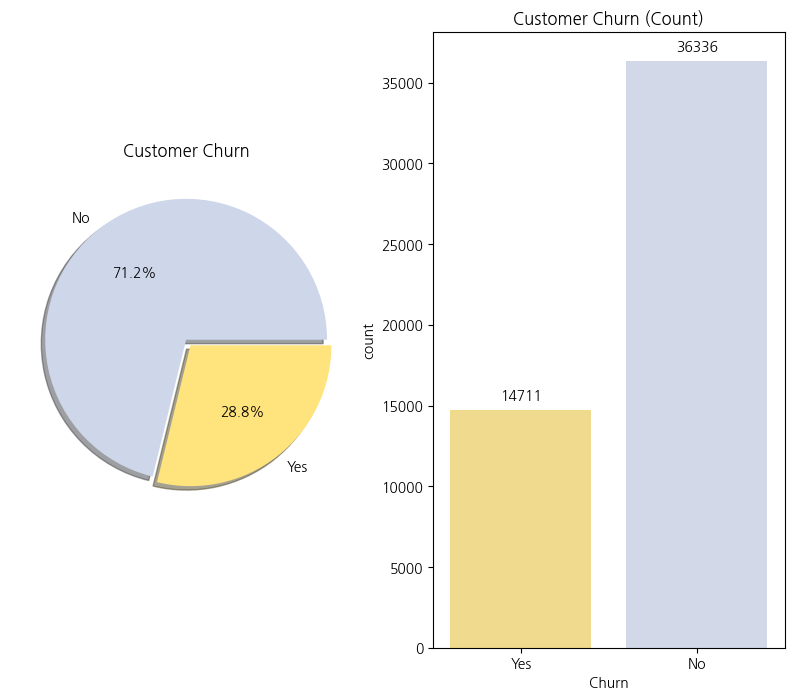

In [18]:
f, ax = plt.subplots(1, 2, figsize = (10, 8)) 

train['Churn'].value_counts().plot.pie(explode = [0, 0.05], # 각 조각 사이 거리
                                            autopct='%1.1f%%', # 퍼센트 표시
                                            ax=ax[0], # 첫번째 위치에 그리기 
                                            colors=['#CED7EA', '#ffe37d'],
                                            shadow=True) 


ax[0].set_title('Customer Churn')
ax[0].set_ylabel('') 

sns.countplot(data=train, x='Churn', ax=ax[1], palette=['#ffe37d','#CED7EA'])
ax[1].set_title('Customer Churn (Count)')
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# ax[1].set_xticklabels(['No', 'Yes'])

plt.rcParams['font.size'] = 12
plt.show()

### 결혼 여부

In [19]:
marriage = train[train['MaritalStatus'] != 'Unknown']

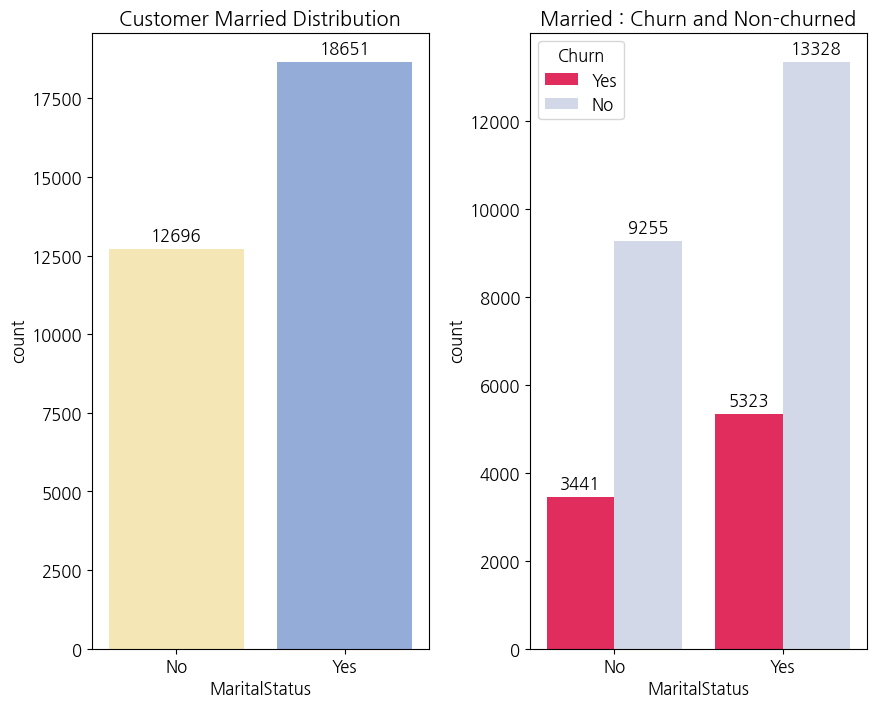

In [20]:
f, ax = plt.subplots(1,2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer Married Distribution')
sns.countplot(x='MaritalStatus', data=marriage, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Married : Churn and Non-churned')
sns.countplot(x='MaritalStatus', data=marriage, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
# ax[1].set_xlabel('Churn')
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 기혼 고객의 이탈률이 더 높은 편이다.

### 자녀 유무

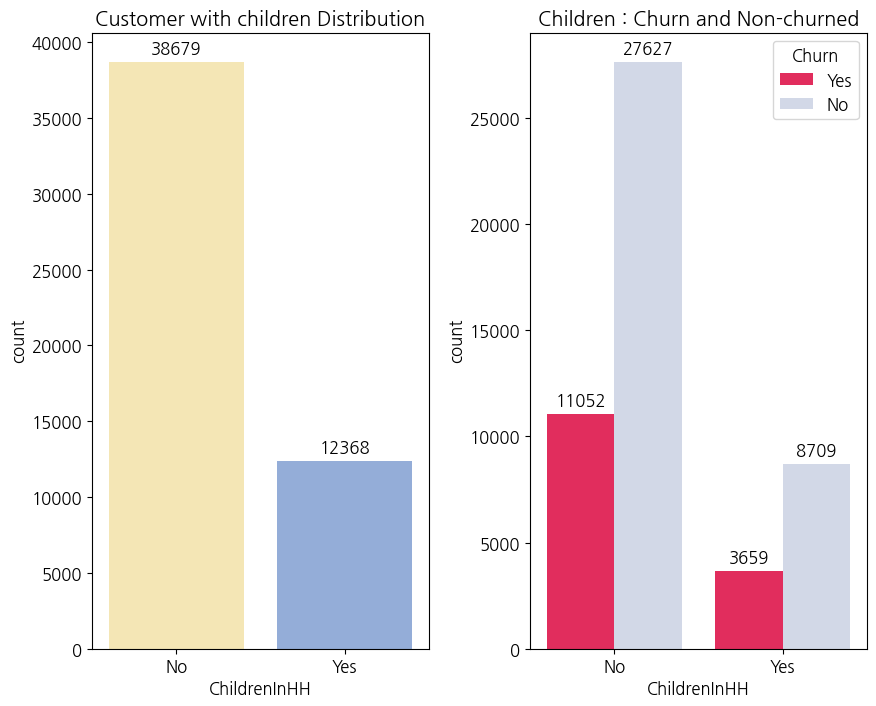

In [21]:
f, ax = plt.subplots(1,2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer with children Distribution')
sns.countplot(x='ChildrenInHH', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Children : Churn and Non-churned')
sns.countplot(x='ChildrenInHH', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])

for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 자녀가 없는 고객의 이탈률이 더 높은 편이다.

### 신용카드 보유

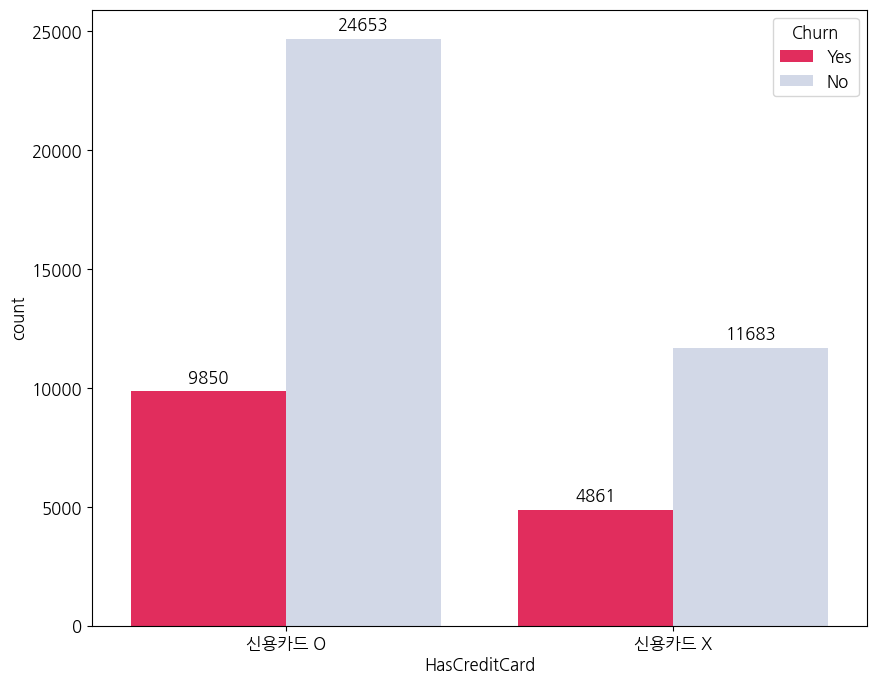

In [22]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='HasCreditCard', data=train, hue='Churn', palette=['#ff0f4f', '#CED7EA'])
for p in ax.patches: # 데이터 텍스트 표시 
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticklabels(['신용카드 O', '신용카드 X'])
plt.rcParams['font.size'] = 12
plt.show()

* 신용카드를 보유한 고객의 이탈률이 더 높은 편이다.

### 신용 등급


In [23]:
get_percent(churn_y, 'CreditRating')

2-High       38.8
1-Highest    17.9
3-Good       17.7
5-Low         9.8
4-Medium      9.5
7-Lowest      4.2
6-VeryLow     2.1
Name: CreditRating, dtype: float64

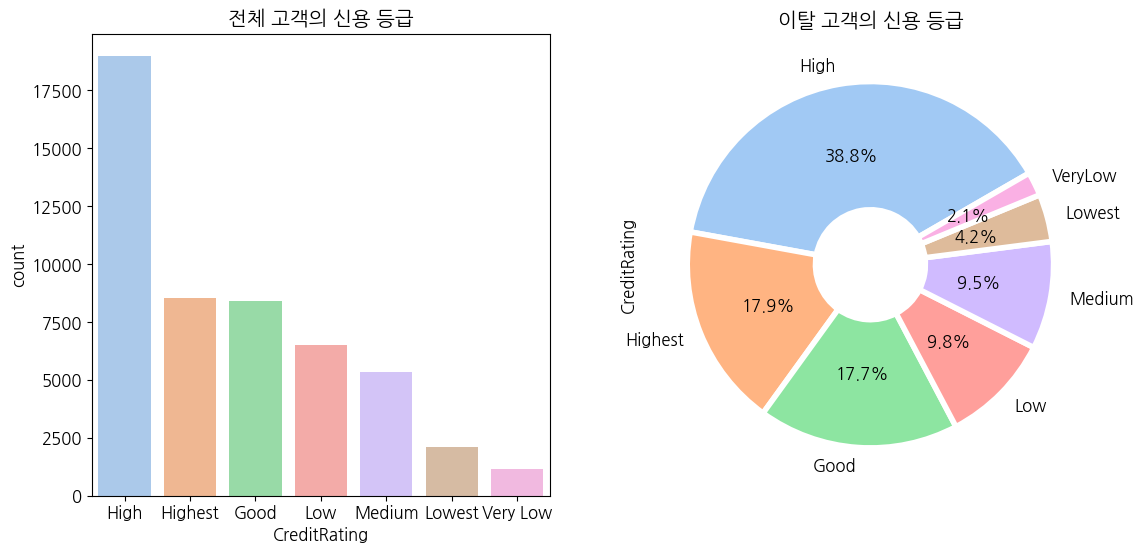

In [24]:
f,ax = plt.subplots(1,2, figsize=(13,6))
sns.set_palette("pastel")

sns.countplot(x='CreditRating', data=train, order = train['CreditRating'].value_counts().index, ax=ax[0])
ax[0].set_title('전체 고객의 신용 등급')
ax[0].set_xticklabels(['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'Very Low'])

(get_percent(churn_y, 'CreditRating').sort_values(ascending=False)).plot.pie(
    autopct='%1.1f%%',
    labels=['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'VeryLow'],
    startangle=30,
    ax=ax[1],
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
    shadow=False
)
ax[1].set_title('이탈 고객의 신용 등급')

plt.show()

* 이탈 고객의 신용 등급을 살펴봤을 때, 신용 등급이 높은 고객(high, highest)이 절반 이상을 차지한다. 

### 소득 계층

In [25]:
income_percent = pd.concat([pivot_percent(churn_y, 'IncomeGroup'), pivot_percent(churn_n, 'IncomeGroup')], axis=1)
income_percent

Churn,Yes,No
IncomeGroup,,
0,26.4,24.6
1,4.0,4.0
2,2.4,2.3
3,5.3,6.1
4,7.6,8.1
5,8.2,8.4
6,18.5,18.9
7,11.9,11.4
8,4.9,5.2


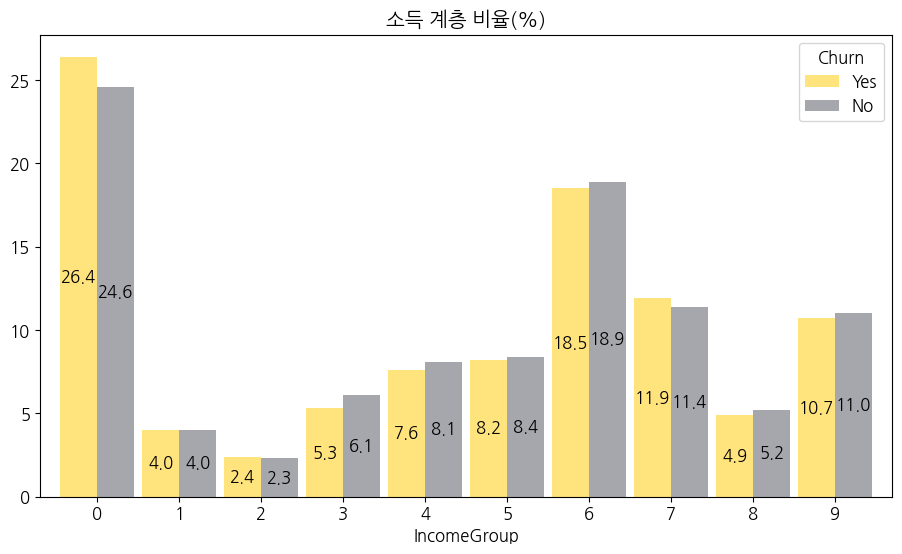

In [26]:
ax = income_percent.plot(kind="bar", figsize=(11,6), width=0.9,
                         color=['#ffe37d', '#a6a7ad'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels, 1), label_type='center')
    
plt.rcParams['font.size'] = 12
plt.title('소득 계층 비율(%)')
plt.xticks(rotation=0)
plt.show()

* 소득 수준을 0~9로 나누었을 때, 소득 계층이 0인 고객의 이탈률이 가장 높다.

### 연령대

In [27]:
get_percent(train, 'age_category')

zero        27.3
forties     15.5
thirties    14.0
twenties    11.8
teen        11.1
fifties     11.1
senior       4.7
child        2.8
Name: age_category, dtype: float64

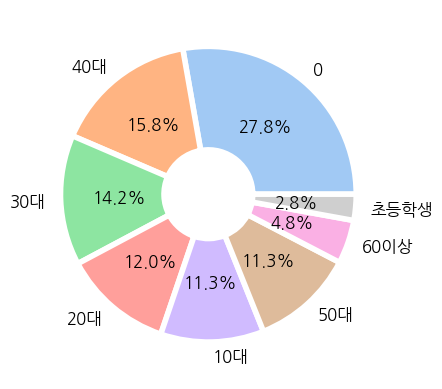

In [28]:
plt.pie(get_percent(train, 'age_category'), 
        autopct='%.1f%%',
        labels=['0', '40대', '30대', '20대', '10대', '50대', '60이상', '초등학생'],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
        colors=sns.set_palette("pastel"),
        shadow=False)

plt.show()

* 해당 데이터는 나이가 0으로 표시된 고객을 제외하고 9세부터 92세까지 다양한 연령대의 고객이 존재한다.
* 9~12세(초등학생), 13~19세(10대), 20대, 30대, 40대, 50대, 60세 이상으로 고객 연령대를 나누었다.
* 40대 고객이 가장 많고 30대도 많은 편이다.

### 서비스 가입 기간

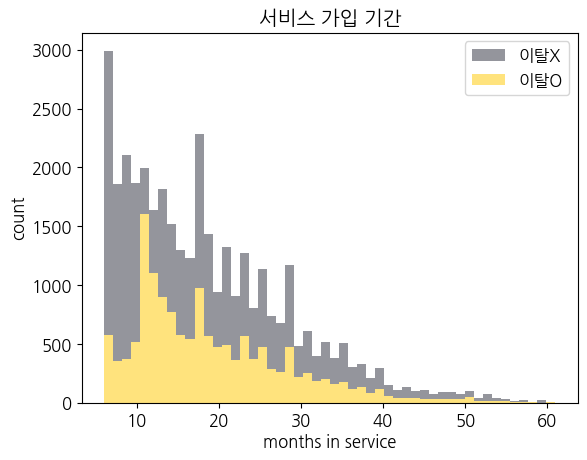

In [29]:
plt.hist((churn_y['MonthsInService'], churn_n['MonthsInService']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('months in service')
plt.ylabel('count')
plt.legend(['이탈X', '이탈O'])
plt.title('서비스 가입 기간')
plt.show()

* 이탈 고객의 서비스 가입 기간은 미이탈 고객보다 짧은 편이다.

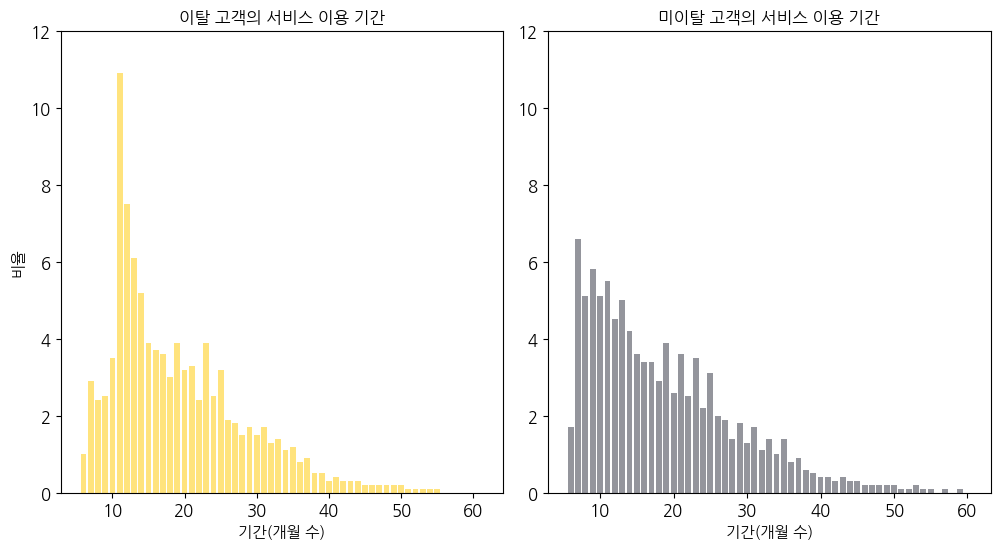

In [30]:
f, axes = plt.subplots(1,2)
f.set_size_inches((12,6))
plt.subplots_adjust(wspace=0.1)

axes[0].bar(get_percent(churn_y, 'MonthsInService').index, get_percent(churn_y, 'MonthsInService').values, color='#ffe37d')
axes[0].set_title('이탈 고객의 서비스 이용 기간', fontsize = 12)
axes[0].set_ylim([0,12])
axes[0].set_xlabel('기간(개월 수)', fontsize = 11)
axes[0].set_ylabel('비율', fontsize = 11)

axes[1].bar(get_percent(churn_n, 'MonthsInService').index, get_percent(churn_n, 'MonthsInService').values, color='#94959c')
axes[1].set_title('미이탈 고객의 서비스 이용 기간', fontsize = 12)
axes[1].set_xlabel('기간(개월 수)', fontsize = 11)
axes[1].set_ylim([0,12])
plt.show()

* 이탈 고객과 미이탈 고객의 서비스 이용 기간을 비율로 나타냈을 때, 이탈 고객의 이용 기간은 11개월이 10.9%로 가장 많았고 12개월은 7.5%, 13개월은 6.1%를 차지한다.
* 미이탈 고객의 서비스 이용 기간은 7개월이 6.6%로 가장 많았다.

### 월별 사용량

In [31]:
churn_y.MonthlyMinutes.describe()

count    14641.000000
mean       483.827471
std        504.634392
min          0.000000
25%        132.000000
50%        330.000000
75%        667.000000
max       5410.000000
Name: MonthlyMinutes, dtype: float64

In [32]:
churn_n.MonthlyMinutes.describe()

count    36250.000000
mean       542.546483
std        538.816505
min          0.000000
25%        170.000000
50%        381.000000
75%        743.000000
max       7359.000000
Name: MonthlyMinutes, dtype: float64

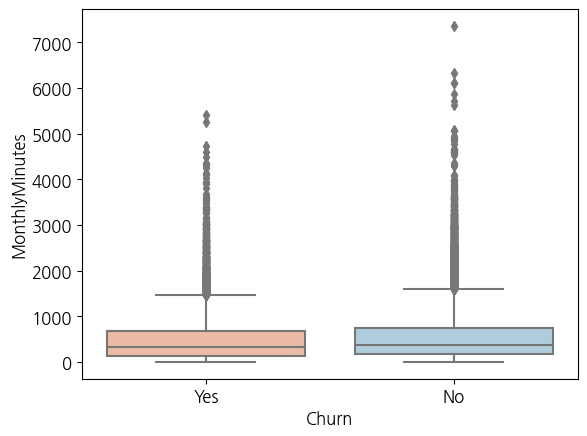

In [33]:
sns.boxplot(data=train, x="Churn", y="MonthlyMinutes", palette = "RdBu");

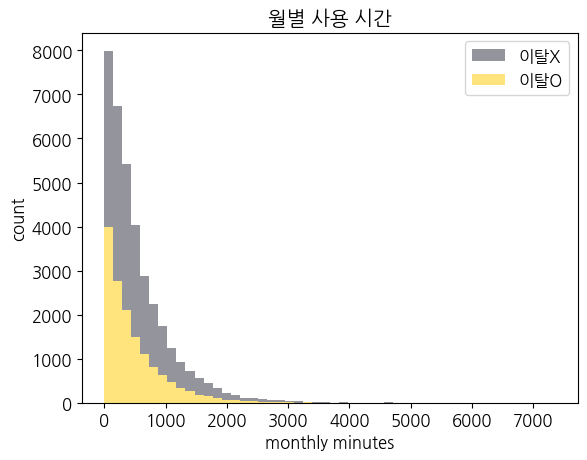

In [34]:
plt.hist((churn_y['MonthlyMinutes'], churn_n['MonthlyMinutes']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('monthly minutes')
plt.ylabel('count')
plt.legend(['이탈X', '이탈O'])
plt.title('월별 사용 시간')
plt.show()

In [35]:
print('월별 이용 시간이 400분 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.MonthlyMinutes<400])/len(train)*100),1))

월별 이용 시간이 400분 미만인 고객: 전체 고객의 53%


In [36]:
print('월별 이용 시간이 400분 미만인 고객: 이탈 고객의 {}%'.format(round(len(churn_y[churn_y.MonthlyMinutes<400])/len(churn_y)*100),1))
print('월별 이용 시간이 400분 미만인 고객: 미이탈 고객의 {}%'.format(round(len(churn_n[churn_n.MonthlyMinutes<400])/len(churn_n)*100),1))

월별 이용 시간이 400분 미만인 고객: 이탈 고객의 57%
월별 이용 시간이 400분 미만인 고객: 미이탈 고객의 52%


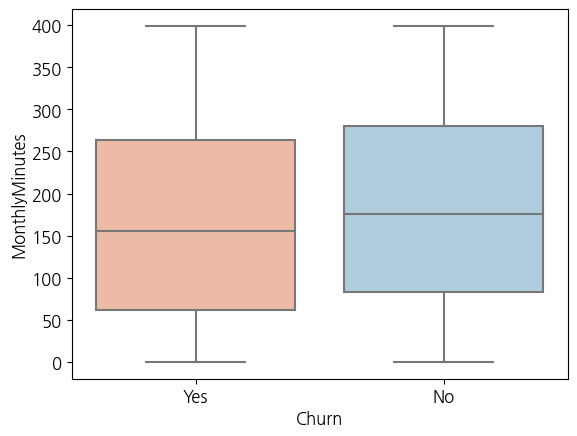

In [37]:
sns.boxplot(data=train[train.MonthlyMinutes<400], x="Churn", y="MonthlyMinutes", palette = "RdBu");

* 이용 시간이 400분 미만인 고객을 대상으로 box plot
* 미이탈 고객의 이용 시간이 이탈 고객보다 조금 더 많다.

### TotalRecurringCharge

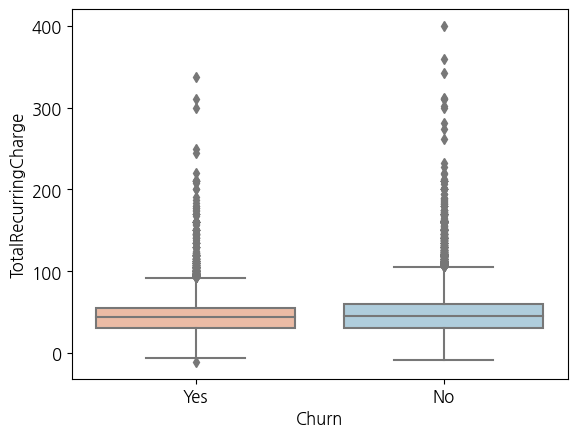

In [38]:
sns.boxplot(data=train, x="Churn", y="TotalRecurringCharge", palette = "RdBu");

In [39]:
churn_y.TotalRecurringCharge.describe()

count    14641.000000
mean        44.529882
std         22.990134
min        -11.000000
25%         30.000000
50%         44.000000
75%         55.000000
max        338.000000
Name: TotalRecurringCharge, dtype: float64

In [40]:
churn_n.TotalRecurringCharge.describe()


count    36250.000000
mean        47.759117
std         24.125276
min         -9.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        400.000000
Name: TotalRecurringCharge, dtype: float64

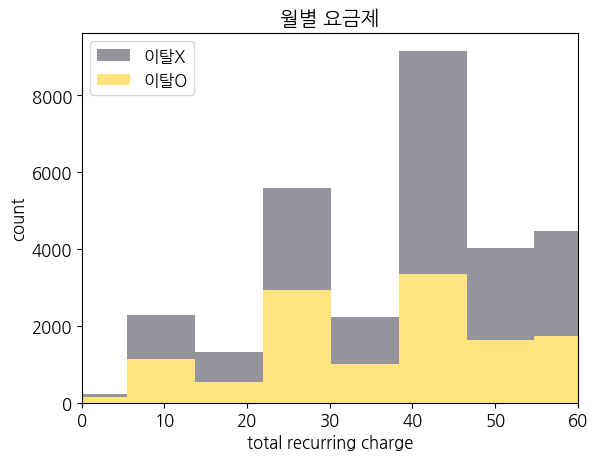

In [41]:
plt.hist((churn_y['TotalRecurringCharge'], churn_n['TotalRecurringCharge']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('total recurring charge')
plt.ylabel('count')
plt.xlim([0,60])
plt.legend(['이탈X', '이탈O'])
plt.title('월별 요금제')
plt.show()

In [42]:
print('월별 요금이 60 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.TotalRecurringCharge<60])/len(train)*100),1))

월별 요금이 60 미만인 고객: 전체 고객의 73%


In [43]:
print('월별 요금이 60 미만인 고객: 이탈 고객의 {}%'.format(round(len(churn_y[churn_y.TotalRecurringCharge<60])/len(churn_y)*100),1))
print('월별 요금이 60 미만인 고객: 미이탈 고객의 {}%'.format(round(len(churn_n[churn_n.TotalRecurringCharge<60])/len(churn_n)*100),1))

월별 요금이 60 미만인 고객: 이탈 고객의 76%
월별 요금이 60 미만인 고객: 미이탈 고객의 71%


In [44]:
under60_y = churn_y[churn_y.TotalRecurringCharge<60]
under60_n = churn_n[churn_n.TotalRecurringCharge<60]

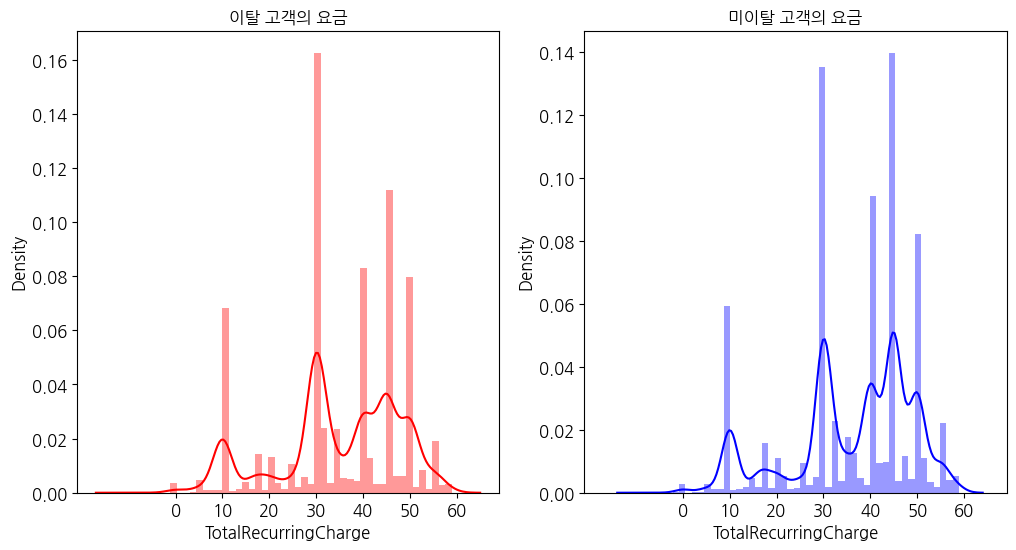

In [45]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.distplot(under60_y['TotalRecurringCharge'], color="Red", ax=axes[0])
axes[0].set_title('이탈 고객의 요금', fontsize = 12)
axes[0].set_xticks([0, 10, 20, 30, 40, 50, 60])

sns.distplot(under60_n['TotalRecurringCharge'], color="Blue", ax=axes[1])
axes[1].set_title('미이탈 고객의 요금', fontsize = 12)

plt.show()

* 이탈 고객은 30달러 요금제를 가장 많이 사용한다.
* 미이탈 고객은 45달러, 30달러 요금제를 많이 사용한다.

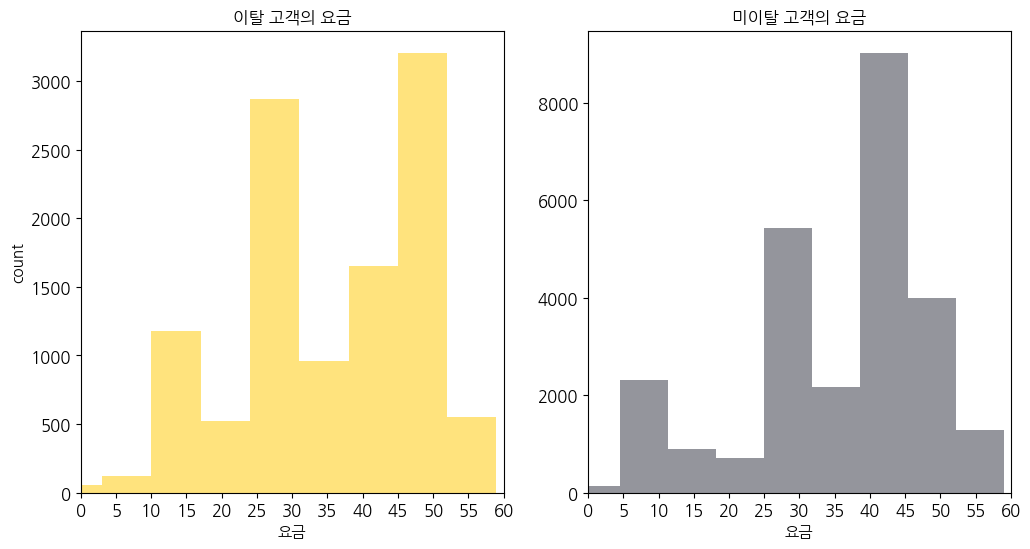

In [46]:
f, axes = plt.subplots(1,2)
f.set_size_inches((12,6))
plt.subplots_adjust(wspace=0.2)

axes[0].hist(under60_y['TotalRecurringCharge'], color='#ffe37d')
axes[0].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
axes[0].set_title('이탈 고객의 요금', fontsize = 12)
axes[0].set_xlim([0,60])
axes[0].set_ylabel('count', fontsize = 11)
axes[0].set_xlabel('요금', fontsize = 11)

axes[1].hist(under60_n['TotalRecurringCharge'], color='#94959c')
axes[1].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
axes[1].set_xlim([0,60])
axes[1].set_title('미이탈 고객의 요금', fontsize = 12)
axes[1].set_xlabel('요금', fontsize = 11)
plt.show()

### 월별 소득

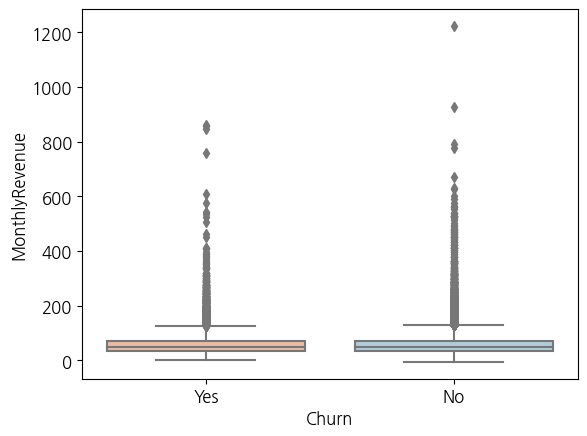

In [47]:
sns.boxplot(data=train, x="Churn", y="MonthlyRevenue", palette = "RdBu");

### 기기 사용 기간

In [48]:
churn_n['CurrentEquipmentDays'].value_counts()

202.0     127
198.0     124
199.0     120
212.0     118
200.0     118
         ... 
1254.0      1
1080.0      1
1246.0      1
1244.0      1
1094.0      1
Name: CurrentEquipmentDays, Length: 1356, dtype: int64

In [49]:
churn_y['CurrentEquipmentDays'].value_counts()

309.0     65
334.0     64
342.0     63
321.0     63
320.0     62
          ..
1267.0     1
1464.0     1
1090.0     1
1207.0     1
975.0      1
Name: CurrentEquipmentDays, Length: 1275, dtype: int64

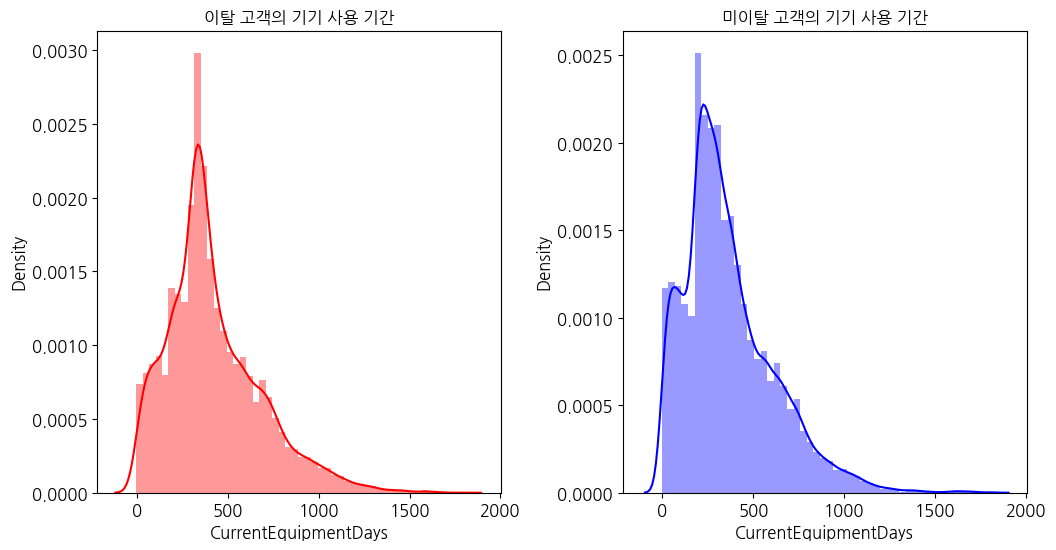

In [50]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
plt.subplots_adjust(wspace=0.3)
sns.distplot(churn_y['CurrentEquipmentDays'], color="Red", ax=axes[0])
axes[0].set_title('이탈 고객의 기기 사용 기간', fontsize = 12)

sns.distplot(churn_n['CurrentEquipmentDays'], color="Blue", ax=axes[1])
axes[1].set_title('미이탈 고객의 기기 사용 기간', fontsize = 12)

plt.show()

* 미이탈 고객의 기기 사용 기간이 짧은 쪽에 더 많이 분포되어 있다.

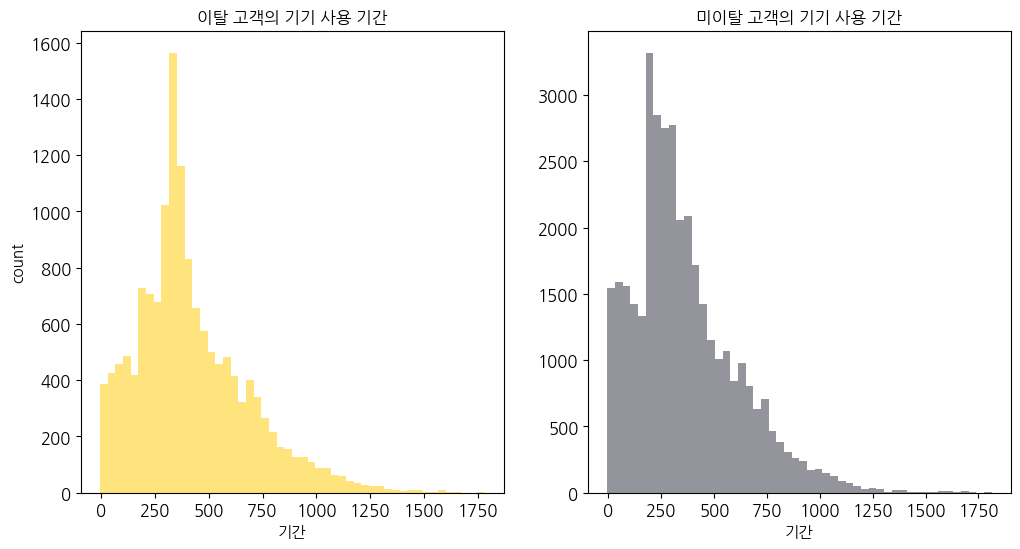

In [51]:
f, axes = plt.subplots(1,2)
f.set_size_inches((12,6))
plt.subplots_adjust(wspace=0.2)

axes[0].hist(churn_y['CurrentEquipmentDays'], color='#ffe37d', bins=50)
axes[0].set_title('이탈 고객의 기기 사용 기간', fontsize = 12)
axes[0].set_ylabel('count', fontsize = 11)
axes[0].set_xlabel('기간', fontsize = 11)

axes[1].hist(churn_n['CurrentEquipmentDays'], color='#94959c', bins=50)
axes[1].set_title('미이탈 고객의 기기 사용 기간', fontsize = 12)
axes[1].set_xlabel('기간', fontsize = 11)
plt.show()

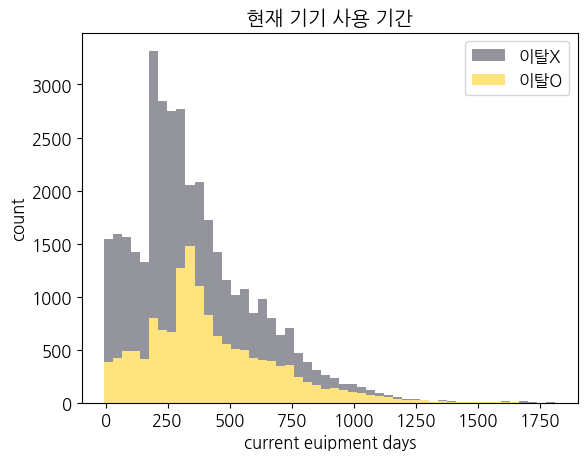

In [52]:
plt.hist((churn_y['CurrentEquipmentDays'], churn_n['CurrentEquipmentDays']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('current euipment days')
plt.ylabel('count')
plt.legend(['이탈X', '이탈O'])
plt.title('현재 기기 사용 기간')
plt.show()

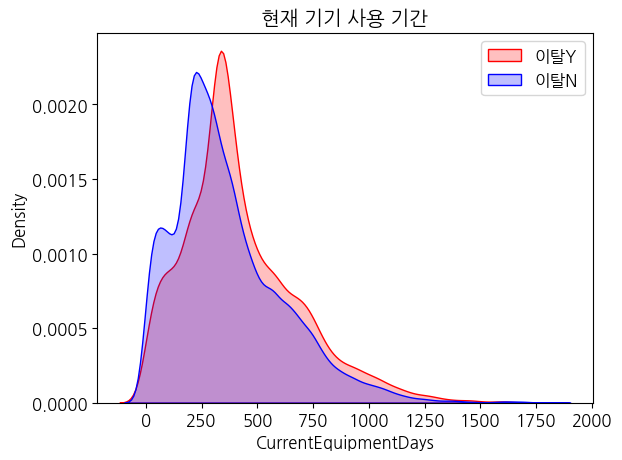

In [53]:
ax = sns.kdeplot(churn_y.CurrentEquipmentDays, color="Red", fill = True)
ax = sns.kdeplot(churn_n.CurrentEquipmentDays, ax = ax, color="Blue", fill= True)
ax.legend(["이탈Y","이탈N"],loc='upper right')
ax.set_title('현재 기기 사용 기간');

### 직업

In [54]:
occupation_percent = pd.concat([pivot_percent(churn_y, 'Occupation'), pivot_percent(churn_n, 'Occupation')], axis=1)
occupation_percent

Churn,Yes,No
Occupation,,
Clerical,2.0,1.9
Crafts,2.9,3.0
Homemaker,0.3,0.3
Other,74.3,73.5
Professional,16.8,17.3
Retired,1.3,1.5
Self,1.7,1.8
Student,0.8,0.7


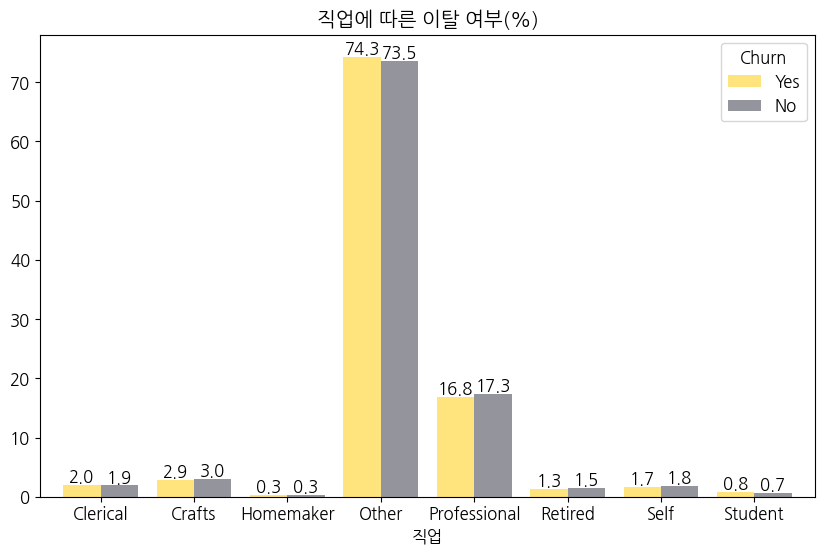

In [55]:
ax = occupation_percent.plot(kind="bar",figsize=(10,6), width=0.8, color = ['#ffe37d','#94959c'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels,1), label_type='edge')

plt.rcParams['font.size'] = 12
plt.title('직업에 따른 이탈 여부(%)')
plt.xticks(rotation=0)
plt.xlabel("직업")
plt.show()

* 사무직, 공예원, 주부, 전문직, 퇴직, 자영업, 학생, 기타 등의 직업으로 나눠졌다.
* 기타를 제외하고 전문직의 이탈률이 가장 높았다.

### IncomeGroup, TotalRecurringCharge

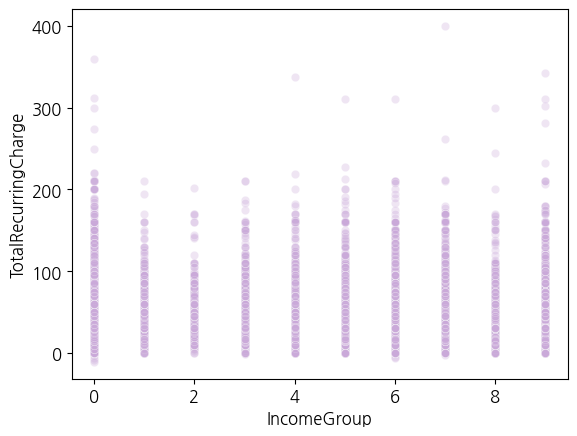

In [56]:
sns.scatterplot(data=train, x='IncomeGroup', y='TotalRecurringCharge', c='#caa9d9',alpha=0.3);

* 소득 계층과 요금은 관련이 없어 보인다.

### CurrentEquipmentDays, TotalRecurringCharge

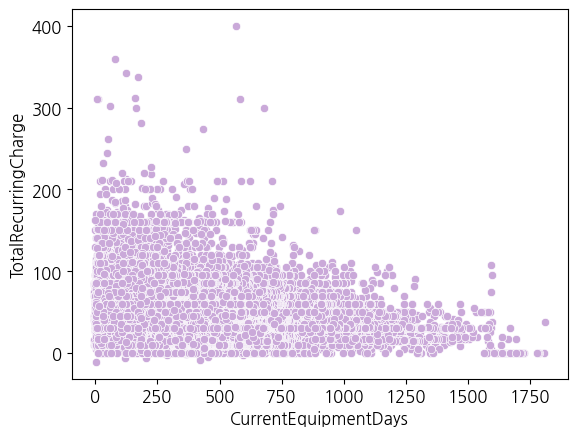

In [57]:
sns.scatterplot(data=train, x='CurrentEquipmentDays', y='TotalRecurringCharge', color='#caa9d9');

* 기기를 사용하는 기간이 길어질수록 요금이 낮아지는 경향을 보인다.

## 3. 머신러닝

In [58]:
# EDA를 위해 생성했던 컬럼 제거
train = train.drop(["count"], axis=1)
train = train.drop(["age_category"], axis=1)

In [59]:
# 범주형 데이터 처리

# Yes는 1로, No는 0으로 변경
train = train.replace('Yes', 1)
train = train.replace('No', 0)

# Homeownership 컬럼: Known:1로, unknown:0으로 변경
train['Homeownership'] = train['Homeownership'].replace({"Known" : 1, "Unknown" : 0})

# MaritalStatus 컬럼의 Unknown: 2로 변경
train['MaritalStatus'] = train['MaritalStatus'].replace("Unknown", 2)

In [60]:
# 나머지 범주형 변수는 라벨인코더 적용
train_cat = train[['CreditRating', 'PrizmCode', 'Occupation']]
le = LabelEncoder()
le_train_cat = train_cat.apply(le.fit_transform)

In [61]:
train[['CreditRating', 'PrizmCode', 'Occupation']] = le_train_cat[['CreditRating', 'PrizmCode', 'Occupation']]

In [62]:
# HandsetPrice 컬럼의 'Unknown'은 Null값으로 변경
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown', np.NaN)
train['HandsetPrice'] = train['HandsetPrice'].astype('float')

In [63]:
train

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.0,1,0,2,4,0,31.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.0,0,3,2,4,1,41.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,NaN,0,2,3,1,1,26.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.0,0,3,0,3,0,15.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.0,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.0,0,0,2,3,1,66.0
51043,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.0,0,2,0,3,0,48.0
51044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80.0,0,4,0,0,0,18.0
51045,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.0,0,4,0,3,0,16.0


In [64]:
# 분류기 성능 반환하는 함수
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc


In [65]:
# 분류기 성능 출력하는 함수
def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print(confusion)
    print('=======================================')
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [66]:
# 모델, 데이터 입력하면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [67]:
# 모델 성능을 dataframe으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

### NULL값 제거하고 모델 성능 확인하기

In [68]:
train1 = train.copy()

In [69]:
train1 = train1.dropna(axis=0)
train1 = train1.reset_index(drop=True)

In [70]:
train1

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.0,1,0,2,4,0,31.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.0,0,3,2,4,1,41.0
2,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.0,0,3,0,3,0,15.0
3,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.0,0,0,0,4,1,50.0
4,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,1.7,13.0,0.7,0.0,42.2,6.7,0.0,33.3,53.0,10.7,0.0,0.7,53,1,1,3.0,2.0,231.0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,30.0,0,2,0,3,1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21495,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,30.3,3.3,0.0,171.9,32.3,0.7,115.0,85.3,16.3,0.0,0.7,35,1,1,4.0,3.0,394.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,80.0,0,2,0,3,0,12.0
21496,1,33.63,28.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,2,1,2.0,2.0,315.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30.0,0,3,0,3,2,0.0
21497,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,7.0,1.3,0.0,0.0,0.0,35,1,1,2.0,2.0,33.0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,3,0,0,30.0,1,0,3,3,2,0.0
21498,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,2.0,2.0,489.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,30.0,0,4,0,4,1,11.0


In [71]:
y = train1['Churn']
X = train1.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

#### LogisticRegression

In [72]:
lr_clf = LogisticRegression(random_state=53, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

[[4584   51]
 [1764   51]]
Accuracy: 0.7186, Precision: 0.5000
Recall: 0.0281, F1: 0.0532, AUC: 0.5085


#### Decision Tree

In [73]:
dt_clf = DecisionTreeClassifier(random_state=53, max_depth=6)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

[[4527  108]
 [1706  109]]
Accuracy: 0.7188, Precision: 0.5023
Recall: 0.0601, F1: 0.1073, AUC: 0.5184


#### Random forest

In [74]:
rf_clf = RandomForestClassifier(random_state=53, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

[[4586   49]
 [1757   58]]
Accuracy: 0.7200, Precision: 0.5421
Recall: 0.0320, F1: 0.0604, AUC: 0.5107


### GradientBoostingClassifier 

In [75]:
gb_clf = GradientBoostingClassifier(random_state=53)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print_clf_eval(y_test, gb_pred)

[[4571   64]
 [1729   86]]
Accuracy: 0.7220, Precision: 0.5733
Recall: 0.0474, F1: 0.0875, AUC: 0.5168


#### XGBClassifier

In [76]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print_clf_eval(y_test, xgb_pred)

[[4472  163]
 [1640  175]]
Accuracy: 0.7205, Precision: 0.5178
Recall: 0.0964, F1: 0.1626, AUC: 0.5306


#### LightGBM

In [77]:
lgbm_clf = LGBMClassifier(n_estimators=1000,
                          num_leaves=64,
                          n_jobs=-1)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[[4344  291]
 [1543  272]]
Accuracy: 0.7157, Precision: 0.4831
Recall: 0.1499, F1: 0.2288, AUC: 0.5435


In [78]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.718605,0.500000,0.028099,0.053208,0.508548
DecisionTreeClassifier,0.718760,0.502304,0.060055,0.107283,0.518377
RandomForestClassifier,0.720000,0.542056,0.031956,0.060354,0.510692
GradientBoostingClassifier,0.722016,0.573333,0.047383,0.087532,0.516787
XGBClassifier,0.720465,0.517751,0.096419,0.162564,0.530626
LGBMClassifier,0.715659,0.483126,0.149862,0.228764,0.543540


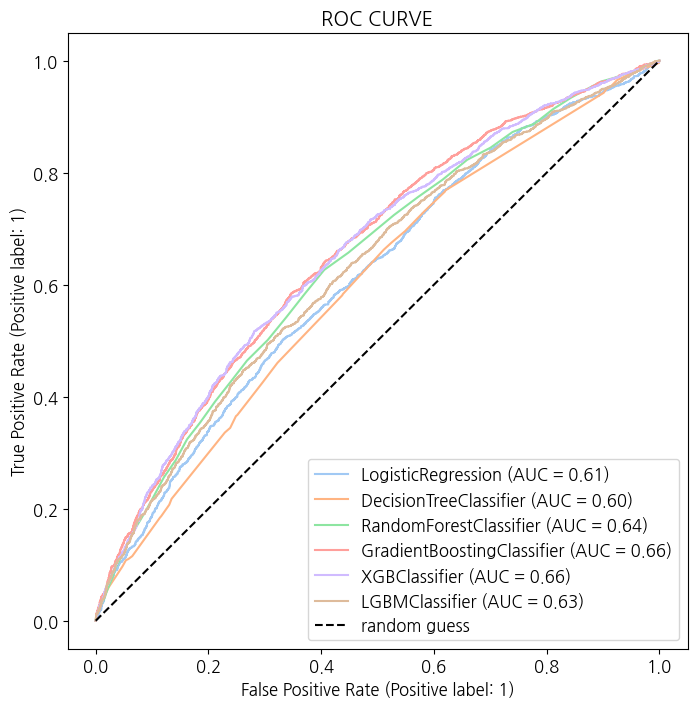

In [79]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

### Null값 채우기(최빈값/평균)

In [80]:
train2 = train.copy()

In [81]:
train2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.0,1,0,2,4,0,31.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.0,0,3,2,4,1,41.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,NaN,0,2,3,1,1,26.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.0,0,3,0,3,0,15.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.0,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.0,0,0,2,3,1,66.0
51043,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.0,0,2,0,3,0,48.0
51044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80.0,0,4,0,0,0,18.0
51045,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.0,0,4,0,3,0,16.0


In [82]:
train2.isnull().sum().sort_values(ascending=False)

HandsetPrice                 28982
Age                            909
PercChangeMinutes              367
PercChangeRevenues             367
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
MonthlyRevenue                 156
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays             1
ThreewayCalls                    0
ReferralsMadeBySubscriber        0
OptOutMailings                   0
NonUSTravel                      0
OwnsComputer                     0
HasCreditCard                    0
RetentionCalls                   0
RetentionOffersAccepted          0
NewCellphoneUser                 0
NotNewCellphoneUser              0
IncomeGroup                      0
ReceivedCalls                    0
OwnsMotorcycle                   0
AdjustmentsToCreditRating        0
DroppedCalls                     0
MadeCallToRetentionT

In [83]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == float or df[col].dtype == int:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
        elif df[col].dtype == object:
            mode = df[col].mode().iloc[0]
            df[col].fillna(mode, inplace=True)
        else:
            continue
        
    return df

In [84]:
train2= fill_missing_values(train2)
train2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.000000,1,0,2,4,0,31.0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.000000,0,3,2,4,1,41.0
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,82.237933,0,2,3,1,1,26.0
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.000000,0,3,0,3,0,15.0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.000000,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.000000,0,0,2,3,1,66.0
51043,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.000000,0,2,0,3,0,48.0
51044,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80.000000,0,4,0,0,0,18.0
51045,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.000000,0,4,0,3,0,16.0


In [85]:
# Calculate the mean of HandsetPrice excluding the 'Unknown' values
mean_price = train2.loc[train2['HandsetPrice'] != np.nan, 'HandsetPrice'].astype(float).mean()

# Replace 'Unknown' values with the mean price
train2.loc[train2['HandsetPrice'] == np.nan, 'HandsetPrice'] = mean_price

In [86]:
# Yes는 1로, No는 0으로 변경
train2 = train2.replace('Yes', 1)
train2 = train2.replace('No', 0)

# Homeownership 컬럼: Known:1로, unknown:0으로 변경
train2['Homeownership'] = train2['Homeownership'].replace({"Known" : 1, "Unknown" : 0})

# MaritalStatus 컬럼의 Unknown: 2로 변경
train2['MaritalStatus'] = train2['MaritalStatus'].replace("Unknown", 2)

# 나머지 범주형 변수는 라벨인코더 적용
train_cat = train[['CreditRating', 'PrizmCode', 'Occupation']]
le = LabelEncoder()
le_train_cat = train_cat.apply(le.fit_transform)

train2[['CreditRating', 'PrizmCode', 'Occupation']] = le_train_cat[['CreditRating', 'PrizmCode', 'Occupation']]

In [87]:
train2.isnull().sum().sort_values(ascending=False)

Churn                        0
RetentionOffersAccepted      0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
HasCreditCard                0
RetentionCalls               0
NewCellphoneUser             0
ChildrenInHH                 0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
MaritalStatus                0
HandsetRefurbished           0
CurrentEquipmentDays         0
MonthlyRevenue               0
ThreewayCalls                0
MonthlyMinutes               0
TotalRecurringCharge         0
Director

In [88]:
train2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.000000,1,0,2,4,0,31.0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.000000,0,3,2,4,1,41.0
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,82.237933,0,2,3,1,1,26.0
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.000000,0,3,0,3,0,15.0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.000000,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.000000,0,0,2,3,1,66.0
51043,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.000000,0,2,0,3,0,48.0
51044,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80.000000,0,4,0,0,0,18.0
51045,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.000000,0,4,0,3,0,16.0


In [89]:
y = train2['Churn']
X = train2.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

In [90]:
lr_clf = LogisticRegression(random_state=67, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=67, max_depth=6)
rf_clf = RandomForestClassifier(random_state=67, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=67)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [91]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.714659,0.468852,0.032866,0.061426,0.509045
DecisionTreeClassifier,0.718642,0.554404,0.049184,0.090353,0.516748
RandomForestClassifier,0.718838,0.532281,0.085268,0.146989,0.527767
GradientBoostingClassifier,0.722690,0.586093,0.081361,0.142886,0.529279
XGBClassifier,0.723735,0.555866,0.137210,0.220092,0.546852
LGBMClassifier,0.715377,0.497824,0.210296,0.295686,0.563056


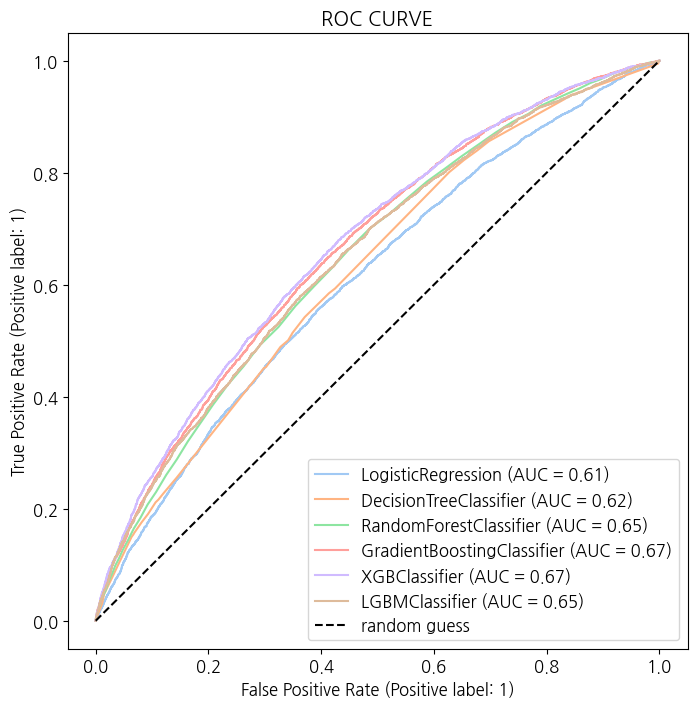

In [92]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

### Outlier 제거

In [93]:
train2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.000000,1,0,2,4,0,31.0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.000000,0,3,2,4,1,41.0
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,82.237933,0,2,3,1,1,26.0
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.000000,0,3,0,3,0,15.0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.000000,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.000000,0,0,2,3,1,66.0
51043,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.000000,0,2,0,3,0,48.0
51044,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80.000000,0,4,0,0,0,18.0
51045,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.000000,0,4,0,3,0,16.0


In [94]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(train2)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(train2)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
train2['out']=y_pred_outliers
outliers=train2.loc[train2['out']== -1]
outlier_index=list(outliers.index)

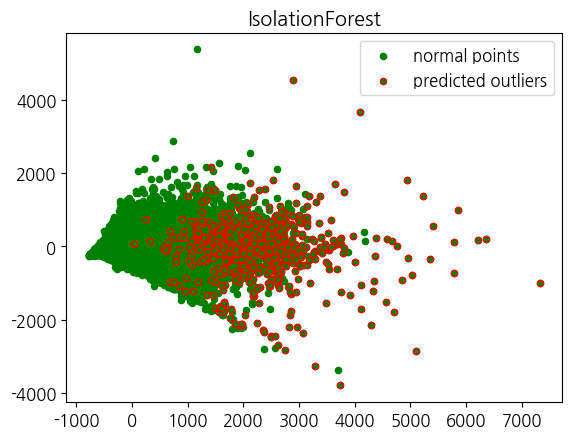

In [95]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(train2)
res=pd.DataFrame(pca.transform(train2))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [96]:
train2 = train2[train2['out'] != -1]
train2 = train2.drop(columns=['out'])
train2 = train2.reset_index(drop=True)

In [97]:
train2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Age
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.000000,1,0,2,4,0,31.0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.000000,0,3,2,4,1,41.0
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,82.237933,0,2,3,1,1,26.0
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.000000,0,3,0,3,0,15.0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.000000,0,0,0,4,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,1,117.490000,384.000000,30.000000,0.000000,250.000000,0.000000,0.000000,0.000000,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,2.0,2.0,489.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,30.000000,0,4,0,4,1,11.0
50532,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60.000000,0,0,2,3,1,66.0
50533,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60.000000,0,2,0,3,0,48.0
50534,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30.000000,0,4,0,3,0,16.0


In [98]:
y = train2['Churn']
X = train2.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [99]:
lr_clf = LogisticRegression(random_state=2, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=2, max_depth=6)
rf_clf = RandomForestClassifier(random_state=2, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=2)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [100]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.710177,0.442197,0.035140,0.065106,0.508641
DecisionTreeClassifier,0.715190,0.534351,0.064309,0.114801,0.520865
RandomForestClassifier,0.719939,0.579412,0.090492,0.156536,0.532014
GradientBoostingClassifier,0.719148,0.593023,0.070280,0.125667,0.525424
XGBClassifier,0.722907,0.572375,0.138953,0.223619,0.548564
LGBMClassifier,0.714729,0.508015,0.211070,0.298231,0.564358


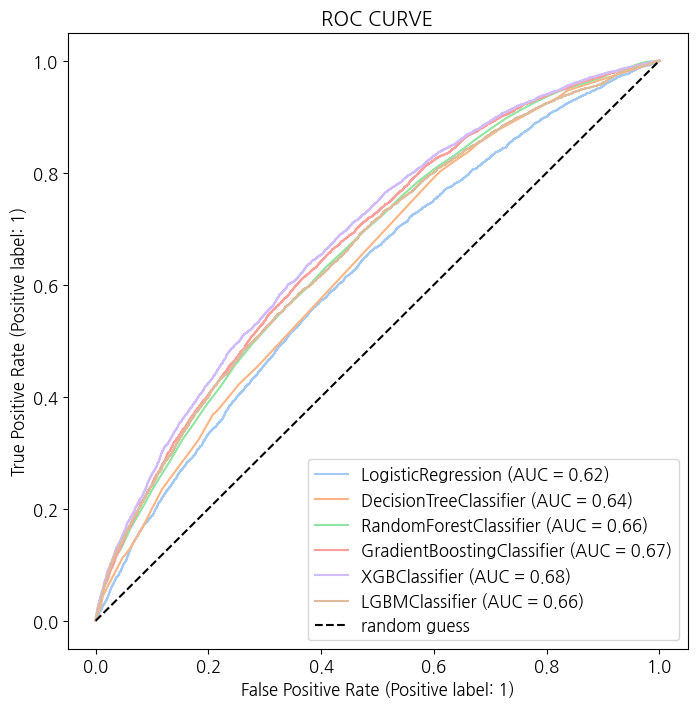

In [101]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

### scaler 적용

In [102]:
numeric_features = train2[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
                           'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
                           'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
                           'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
                           'AdjustmentsToCreditRating', 'HandsetPrice', 'Age']]

categoric_features = train2[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
                             'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle',
                             'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']]

In [103]:
#### standardscaler

In [104]:
# 수치형 변수 표준화
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,-0.837726,-0.596498,-1.065906,-0.317526,-0.458926,-0.130106,-0.608476,-0.486124,-0.603630,-0.313769,-0.589318,-0.363775,-0.268062,-0.073299,-0.762516,-0.530199,-0.307185,-0.489832,-0.585259,-0.019386,-0.339657,4.326013,0.384647,-0.524419,0.172426,0.522208,-0.086091,4.712250,-0.127160,-0.191148,-0.138718,-1.325153,0.227293
1,-1.014845,-1.033336,-1.285350,-0.451607,-0.458926,-0.130106,0.024633,0.026543,-0.651595,-0.382584,-0.692169,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.887591,-0.771821,-0.655076,-0.019386,-0.421573,4.018989,-0.433093,-0.524419,0.172426,-0.618528,4.420106,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,0.706243
2,-0.483994,-1.037517,-0.363687,-0.451607,-0.458926,-0.130106,0.032909,0.026543,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.722366,-0.753027,-0.530199,-0.928110,-0.738718,-0.676021,-0.019386,-0.421573,4.223672,-0.433093,-0.524419,-0.610815,-0.618528,5.634374,-0.179059,-0.127160,-0.191148,-0.138718,0.007871,-0.012182
3,0.634811,1.688021,1.260196,0.213437,-0.458926,-0.130106,0.690845,0.245101,5.547948,0.374384,1.401991,0.505216,1.023517,0.618011,10.950009,9.758861,5.143153,2.939397,3.492038,-0.019386,5.776744,4.121330,0.384647,0.959790,5.655109,2.803679,0.296325,-0.179059,-0.127160,-0.191148,-0.138718,-1.835519,-0.539026
4,-1.011055,-1.054238,-1.285350,-0.451607,-0.458926,-0.130106,0.041185,0.021146,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.942346,-0.784082,-0.676021,-0.019386,-0.421573,3.507281,0.384647,0.959790,1.738906,1.662943,1.849642,-0.179059,-0.127160,-0.191148,2.514680,-1.835519,1.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,1.524449,-0.251625,-0.714797,-0.451607,2.701626,-0.130106,0.041185,0.026543,-0.207914,-0.284277,0.002075,-0.363775,-0.268062,-0.579545,-0.721397,-0.530199,0.145093,-0.118343,-0.326937,-0.019386,-0.421573,1.153426,-0.433093,-0.524419,0.172426,0.522208,0.418540,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,-0.730606
50532,0.042423,0.044450,0.023855,0.028527,0.047114,0.008138,-0.006600,-0.005620,0.427629,-0.117154,0.610610,-0.363775,-0.268062,-0.330110,-0.224809,-0.439207,0.813107,-0.375811,0.161780,-0.019386,-0.339657,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.564410,-0.179059,-0.127160,-0.191148,-0.138718,-0.559604,1.903617
50533,0.960498,2.593050,1.699084,0.079355,0.109974,0.395475,0.546017,0.455564,1.314991,-0.313769,0.410622,-0.363775,-0.268062,3.844570,2.074680,1.800588,2.547754,2.260172,0.531809,-0.019386,3.483094,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.319979,-0.179059,-0.127160,-0.191148,2.514680,-0.559604,1.041507
50534,0.042423,0.044450,0.023855,0.028527,0.047114,0.008138,-0.006600,-0.005620,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.942346,-0.784082,-0.676021,-0.019386,-0.421573,1.255768,-0.433093,-0.524419,0.172426,0.522208,0.197764,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,-0.491131


In [105]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
X

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,4,0,1,0,2,4,0,-0.837726,-0.596498,-1.065906,-0.317526,-0.458926,-0.130106,-0.608476,-0.486124,-0.603630,-0.313769,-0.589318,-0.363775,-0.268062,-0.073299,-0.762516,-0.530199,-0.307185,-0.489832,-0.585259,-0.019386,-0.339657,4.326013,0.384647,-0.524419,0.172426,0.522208,-0.086091,4.712250,-0.127160,-0.191148,-0.138718,-1.325153,0.227293
1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,5,0,0,3,2,4,1,-1.014845,-1.033336,-1.285350,-0.451607,-0.458926,-0.130106,0.024633,0.026543,-0.651595,-0.382584,-0.692169,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.887591,-0.771821,-0.655076,-0.019386,-0.421573,4.018989,-0.433093,-0.524419,0.172426,-0.618528,4.420106,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,0.706243
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,6,0,0,2,3,1,1,-0.483994,-1.037517,-0.363687,-0.451607,-0.458926,-0.130106,0.032909,0.026543,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.722366,-0.753027,-0.530199,-0.928110,-0.738718,-0.676021,-0.019386,-0.421573,4.223672,-0.433093,-0.524419,-0.610815,-0.618528,5.634374,-0.179059,-0.127160,-0.191148,-0.138718,0.007871,-0.012182
3,0,0,1,0,0,1,1,1,0,0,0,1,1,0,6,0,0,3,0,3,0,0.634811,1.688021,1.260196,0.213437,-0.458926,-0.130106,0.690845,0.245101,5.547948,0.374384,1.401991,0.505216,1.023517,0.618011,10.950009,9.758861,5.143153,2.939397,3.492038,-0.019386,5.776744,4.121330,0.384647,0.959790,5.655109,2.803679,0.296325,-0.179059,-0.127160,-0.191148,-0.138718,-1.835519,-0.539026
4,0,0,0,0,0,1,1,1,0,0,1,1,0,1,9,0,0,0,0,4,1,-1.011055,-1.054238,-1.285350,-0.451607,-0.458926,-0.130106,0.041185,0.021146,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.942346,-0.784082,-0.676021,-0.019386,-0.421573,3.507281,0.384647,0.959790,1.738906,1.662943,1.849642,-0.179059,-0.127160,-0.191148,2.514680,-1.835519,1.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,0,0,1,0,0,1,0,0,0,0,0,1,0,0,2,0,0,4,0,4,1,1.524449,-0.251625,-0.714797,-0.451607,2.701626,-0.130106,0.041185,0.026543,-0.207914,-0.284277,0.002075,-0.363775,-0.268062,-0.579545,-0.721397,-0.530199,0.145093,-0.118343,-0.326937,-0.019386,-0.421573,1.153426,-0.433093,-0.524419,0.172426,0.522208,0.418540,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,-0.730606
50532,0,1,1,0,0,1,1,1,0,0,0,1,0,0,6,0,0,0,2,3,1,0.042423,0.044450,0.023855,0.028527,0.047114,0.008138,-0.006600,-0.005620,0.427629,-0.117154,0.610610,-0.363775,-0.268062,-0.330110,-0.224809,-0.439207,0.813107,-0.375811,0.161780,-0.019386,-0.339657,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.564410,-0.179059,-0.127160,-0.191148,-0.138718,-0.559604,1.903617
50533,1,0,1,0,0,1,1,1,0,0,1,1,0,0,9,0,0,2,0,3,0,0.960498,2.593050,1.699084,0.079355,0.109974,0.395475,0.546017,0.455564,1.314991,-0.313769,0.410622,-0.363775,-0.268062,3.844570,2.074680,1.800588,2.547754,2.260172,0.531809,-0.019386,3.483094,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.319979,-0.179059,-0.127160,-0.191148,2.514680,-0.559604,1.041507
50534,1,0,1,0,0,0,0,0,0,0,0,0

In [106]:
y = train2['Churn']
y

0        1
1        1
2        0
3        0
4        1
        ..
50531    1
50532    1
50533    0
50534    0
50535    0
Name: Churn, Length: 50536, dtype: int64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [108]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [109]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.707737,0.503125,0.036319,0.067747,0.510749
DecisionTreeClassifier,0.710177,0.525424,0.090909,0.155000,0.528490
RandomForestClassifier,0.714729,0.586538,0.082563,0.144750,0.529257
GradientBoostingClassifier,0.715784,0.623016,0.070832,0.127203,0.526561
XGBClassifier,0.718027,0.579960,0.129258,0.211400,0.545287
LGBMClassifier,0.708660,0.504556,0.199865,0.286314,0.559384


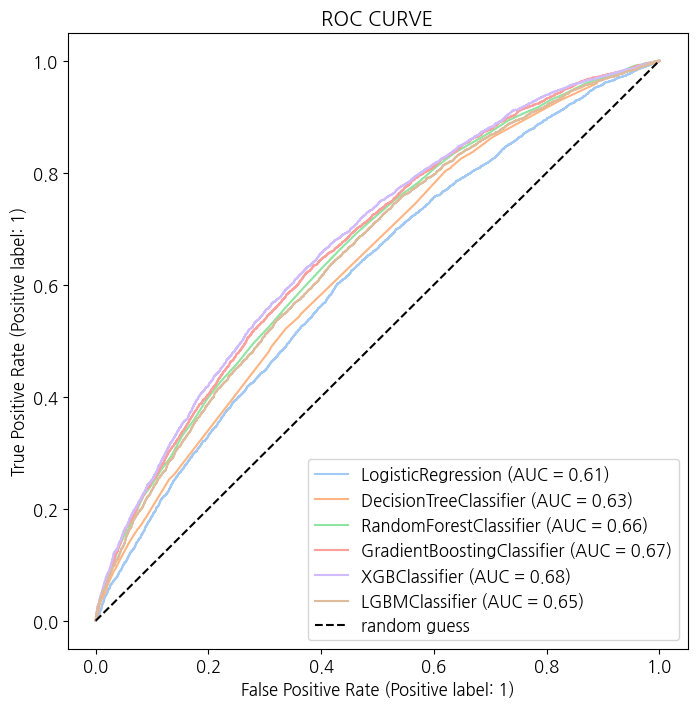

In [110]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

In [111]:
#### minmaxscaler

In [112]:
scaler = MinMaxScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,0.024537,0.046408,0.080292,0.005549,0.000000,0.000000,0.377879,0.303158,0.003157,0.001821,0.007500,0.000000,0.000000,0.037109,0.000000,0.000000,0.044892,0.025497,0.003158,0.0,0.003436,1.000000,0.005128,0.018868,0.043478,0.1,0.201431,0.25,0.000000,0.0,0.00,0.040816,0.336957
1,0.018836,0.002119,0.068127,0.000000,0.000000,0.000000,0.395673,0.308448,0.001353,0.000000,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.003870,0.001062,0.000729,0.0,0.000000,0.945455,0.000000,0.018868,0.043478,0.0,0.830490,0.00,0.000000,0.0,0.00,0.040816,0.445652
2,0.035924,0.001695,0.119221,0.000000,0.000000,0.000000,0.395906,0.308448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000153,0.000577,0.000000,0.001006,0.003931,0.000000,0.0,0.000000,0.981818,0.000000,0.018868,0.000000,0.0,1.000000,0.00,0.000000,0.0,0.00,0.147424,0.282609
3,0.071937,0.278025,0.209246,0.027525,0.000000,0.000000,0.414399,0.310704,0.234551,0.020036,0.090476,0.013138,0.019908,0.076471,0.711705,0.488372,0.430108,0.322639,0.145009,0.0,0.260023,0.963636,0.005128,0.037736,0.347826,0.3,0.254816,0.00,0.000000,0.0,0.00,0.000000,0.163043
4,0.018958,0.000000,0.068127,0.000000,0.000000,0.000000,0.396139,0.308393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.854545,0.005128,0.037736,0.130435,0.2,0.471657,0.00,0.000000,0.0,0.04,0.000000,0.543478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,0.100573,0.081373,0.099757,0.000000,0.097656,0.000000,0.396139,0.308448,0.018042,0.002602,0.032143,0.000000,0.000000,0.008285,0.002499,0.000000,0.076858,0.057686,0.012145,0.0,0.000000,0.436364,0.000000,0.018868,0.043478,0.1,0.271877,0.00,0.000000,0.0,0.00,0.040816,0.119565
50532,0.052869,0.111391,0.140706,0.019872,0.015636,0.001111,0.394796,0.308117,0.041949,0.007026,0.057500,0.000000,0.000000,0.022487,0.032673,0.004319,0.124071,0.035377,0.029147,0.0,0.003436,0.418182,0.000000,0.018868,0.043478,0.1,0.292240,0.00,0.000000,0.0,0.00,0.102041,0.717391
50533,0.082420,0.369782,0.233577,0.021976,0.017578,0.004225,0.410328,0.312876,0.075327,0.001821,0.049167,0.000000,0.000000,0.260184,0.172401,0.110631,0.246672,0.263784,0.042021,0.0,0.163803,0.418182,0.000000,0.018868,0.043478,0.1,0.258118,0.00,0.000000,0.0,0.04,0.102041,0.521739
50534,0.052869,0.111391,0.140706,0.019872,0.015636,0.001111,0.394796,0.308117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.454545,0.000000,0.018868,0.043478,0.1,0.241057,0.00,0.000000,0.0,0.00,0.040816,0.173913


In [113]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
y = train2['Churn']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [115]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [116]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.707143,0.485830,0.027070,0.051282,0.507616
DecisionTreeClassifier,0.710177,0.525424,0.090909,0.155000,0.528490
RandomForestClassifier,0.714201,0.579114,0.082563,0.144521,0.528884
GradientBoostingClassifier,0.715784,0.623016,0.070832,0.127203,0.526561
XGBClassifier,0.718027,0.579960,0.129258,0.211400,0.545287
LGBMClassifier,0.708858,0.505438,0.199188,0.285761,0.559325


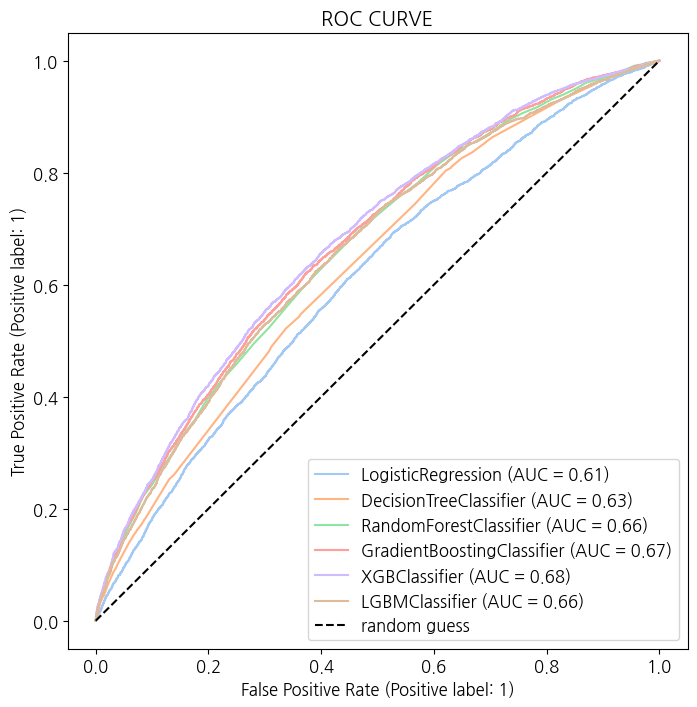

In [117]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

#### robustscaler

In [118]:
scaler = RobustScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,-0.662908,-0.263736,-0.766667,0.000000,-0.050000,0.000000,-1.041379,-2.280488,-0.348485,-0.081081,-0.315961,0.000000,0.000000,0.324344,-0.443333,-0.222222,-0.031250,-0.146082,-0.377358,0.0,0.000000,3.461538,1.0,0.0,1.0,1.0,0.096463,1.0,0.0,0.0,0.0,-23.342041,0.108156
1,-0.855689,-0.646520,-0.933333,-0.337838,-0.050000,0.000000,0.013793,0.036585,-0.409091,-0.270270,-0.433225,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.583333,-0.451527,-0.471698,0.0,-0.230769,3.230769,0.0,0.0,1.0,0.0,3.771704,0.0,0.0,0.0,0.0,-23.342041,0.335429
2,-0.277896,-0.650183,-0.233333,-0.337838,-0.050000,0.000000,0.027586,0.036585,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.362669,-0.433333,-0.222222,-0.621875,-0.415671,-0.500000,0.0,-0.230769,3.384615,0.0,0.0,0.0,0.0,4.762058,0.0,0.0,0.0,0.0,0.000000,-0.005480
3,0.939842,1.738095,1.000000,1.337838,-0.050000,0.000000,1.124138,1.024390,7.424242,1.810811,1.954397,2.529412,4.333333,1.056068,11.900000,16.111111,5.153125,3.568393,5.132075,0.0,17.230769,3.307692,1.0,1.0,8.0,3.0,0.408360,0.0,0.0,0.0,0.0,-32.278858,-0.255480
4,-0.851564,-0.664835,-0.933333,-0.337838,-0.050000,0.000000,0.041379,0.012195,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.635417,-0.464807,-0.500000,0.0,-0.230769,2.846154,1.0,1.0,3.0,2.0,1.675241,0.0,0.0,0.0,1.0,-32.278858,0.539974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,1.908147,0.038462,-0.500000,-0.337838,6.200000,0.000000,0.041379,0.036585,0.151515,0.000000,0.358306,0.000000,0.000000,-0.211498,-0.400000,-0.222222,0.398958,0.256308,-0.028302,0.0,-0.230769,1.076923,0.0,0.0,1.0,1.0,0.508039,0.0,0.0,0.0,0.0,-23.342041,-0.346389
50532,0.295070,0.297900,0.061003,0.871931,0.950695,4.120814,-0.038261,-0.108779,0.954545,0.459459,1.052117,0.000000,0.000000,0.052520,0.123333,-0.077778,1.034375,-0.022576,0.632075,0.0,0.000000,1.000000,0.0,0.0,1.0,1.0,0.627010,0.0,0.0,0.0,0.0,-9.936817,0.903611
50533,1.294328,2.531136,1.333333,1.000000,1.075000,15.666667,0.882759,1.975610,2.075758,-0.081081,0.824104,0.000000,0.000000,4.471256,2.546667,3.477778,2.684375,2.832669,1.132075,0.0,10.769231,1.000000,0.0,0.0,1.0,1.0,0.427653,0.0,0.0,0.0,1.0,-9.936817,0.494520
50534,0.295070,0.297900,0.061003,0.871931,0.950695,4.120814,-0.038261,-0.108779,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.635417,-0.464807,-0.500000,0.0,-0.230769,1.153846,0.0,0.0,1.0,1.0,0.327974,0.0,0.0,0.0,0.0,-23.342041,-0.232753


In [119]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
y = train2['Churn']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [121]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [122]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.707869,0.506289,0.036319,0.067775,0.510842
DecisionTreeClassifier,0.710177,0.525424,0.090909,0.155000,0.528490
RandomForestClassifier,0.714795,0.586645,0.083239,0.145792,0.529502
GradientBoostingClassifier,0.715784,0.623016,0.070832,0.127203,0.526561
XGBClassifier,0.718027,0.579960,0.129258,0.211400,0.545287
LGBMClassifier,0.708528,0.503885,0.204827,0.291259,0.560747


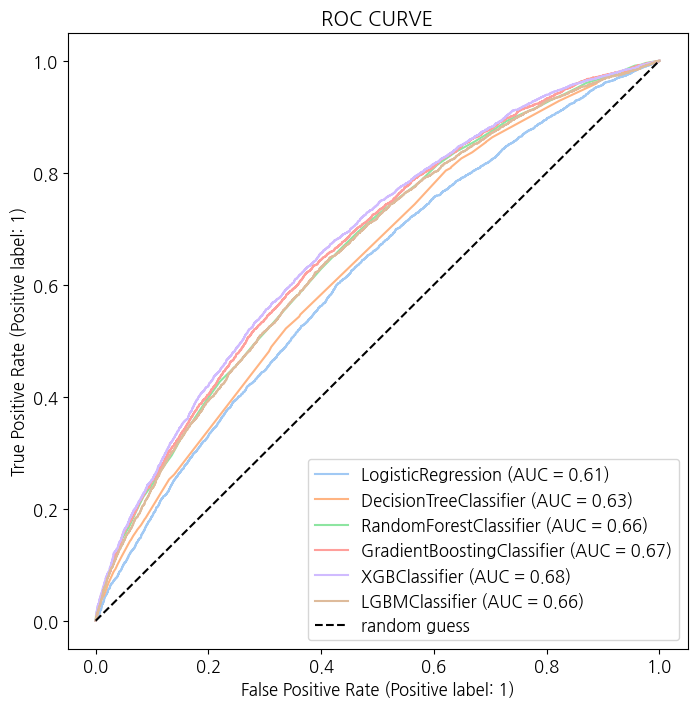

In [123]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train, y_train), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train, y_train), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

### Oversampling

In [124]:
y = train2['Churn']
X = train2.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [125]:
smote = SMOTE(random_state=60)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((50438, 54), (50438,))

In [126]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [127]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.596069,0.345796,0.427701,0.382412,0.546671
DecisionTreeClassifier,0.612493,0.361877,0.426122,0.391381,0.557813
RandomForestClassifier,0.683662,0.417312,0.206632,0.276403,0.543706
GradientBoostingClassifier,0.674428,0.406262,0.245883,0.306352,0.548697
XGBClassifier,0.702856,0.480000,0.194902,0.277234,0.553827
LGBMClassifier,0.705692,0.492930,0.228062,0.311845,0.565560


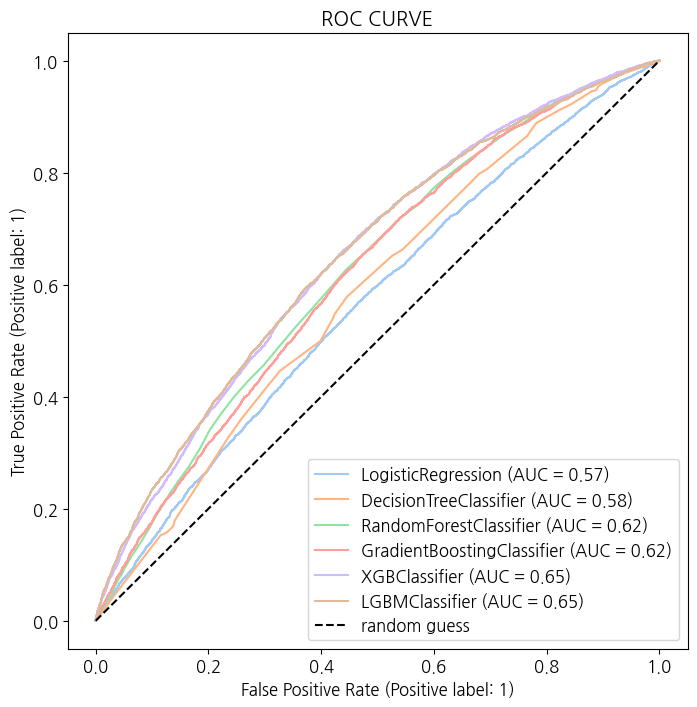

In [128]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

In [129]:
#### standardscaler + oversampling

In [130]:
# 수치형 변수 표준화
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,-0.837726,-0.596498,-1.065906,-0.317526,-0.458926,-0.130106,-0.608476,-0.486124,-0.603630,-0.313769,-0.589318,-0.363775,-0.268062,-0.073299,-0.762516,-0.530199,-0.307185,-0.489832,-0.585259,-0.019386,-0.339657,4.326013,0.384647,-0.524419,0.172426,0.522208,-0.086091,4.712250,-0.127160,-0.191148,-0.138718,-1.325153,0.227293
1,-1.014845,-1.033336,-1.285350,-0.451607,-0.458926,-0.130106,0.024633,0.026543,-0.651595,-0.382584,-0.692169,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.887591,-0.771821,-0.655076,-0.019386,-0.421573,4.018989,-0.433093,-0.524419,0.172426,-0.618528,4.420106,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,0.706243
2,-0.483994,-1.037517,-0.363687,-0.451607,-0.458926,-0.130106,0.032909,0.026543,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.722366,-0.753027,-0.530199,-0.928110,-0.738718,-0.676021,-0.019386,-0.421573,4.223672,-0.433093,-0.524419,-0.610815,-0.618528,5.634374,-0.179059,-0.127160,-0.191148,-0.138718,0.007871,-0.012182
3,0.634811,1.688021,1.260196,0.213437,-0.458926,-0.130106,0.690845,0.245101,5.547948,0.374384,1.401991,0.505216,1.023517,0.618011,10.950009,9.758861,5.143153,2.939397,3.492038,-0.019386,5.776744,4.121330,0.384647,0.959790,5.655109,2.803679,0.296325,-0.179059,-0.127160,-0.191148,-0.138718,-1.835519,-0.539026
4,-1.011055,-1.054238,-1.285350,-0.451607,-0.458926,-0.130106,0.041185,0.021146,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.942346,-0.784082,-0.676021,-0.019386,-0.421573,3.507281,0.384647,0.959790,1.738906,1.662943,1.849642,-0.179059,-0.127160,-0.191148,2.514680,-1.835519,1.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,1.524449,-0.251625,-0.714797,-0.451607,2.701626,-0.130106,0.041185,0.026543,-0.207914,-0.284277,0.002075,-0.363775,-0.268062,-0.579545,-0.721397,-0.530199,0.145093,-0.118343,-0.326937,-0.019386,-0.421573,1.153426,-0.433093,-0.524419,0.172426,0.522208,0.418540,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,-0.730606
50532,0.042423,0.044450,0.023855,0.028527,0.047114,0.008138,-0.006600,-0.005620,0.427629,-0.117154,0.610610,-0.363775,-0.268062,-0.330110,-0.224809,-0.439207,0.813107,-0.375811,0.161780,-0.019386,-0.339657,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.564410,-0.179059,-0.127160,-0.191148,-0.138718,-0.559604,1.903617
50533,0.960498,2.593050,1.699084,0.079355,0.109974,0.395475,0.546017,0.455564,1.314991,-0.313769,0.410622,-0.363775,-0.268062,3.844570,2.074680,1.800588,2.547754,2.260172,0.531809,-0.019386,3.483094,1.051085,-0.433093,-0.524419,0.172426,0.522208,0.319979,-0.179059,-0.127160,-0.191148,2.514680,-0.559604,1.041507
50534,0.042423,0.044450,0.023855,0.028527,0.047114,0.008138,-0.006600,-0.005620,-0.687570,-0.382584,-0.769307,-0.363775,-0.268062,-0.725048,-0.762516,-0.530199,-0.942346,-0.784082,-0.676021,-0.019386,-0.421573,1.255768,-0.433093,-0.524419,0.172426,0.522208,0.197764,-0.179059,-0.127160,-0.191148,-0.138718,-1.325153,-0.491131


In [131]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
y = train2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [132]:
smote = SMOTE(random_state=60)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((50438, 54), (50438,))

In [133]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [134]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.573775,0.339706,0.484999,0.399554,0.547729
DecisionTreeClassifier,0.567839,0.347532,0.544778,0.424354,0.561073
RandomForestClassifier,0.685245,0.427409,0.225130,0.294917,0.550251
GradientBoostingClassifier,0.683662,0.428062,0.243627,0.310523,0.554560
XGBClassifier,0.711035,0.517735,0.171216,0.257332,0.552657
LGBMClassifier,0.706154,0.494204,0.211595,0.296320,0.561055


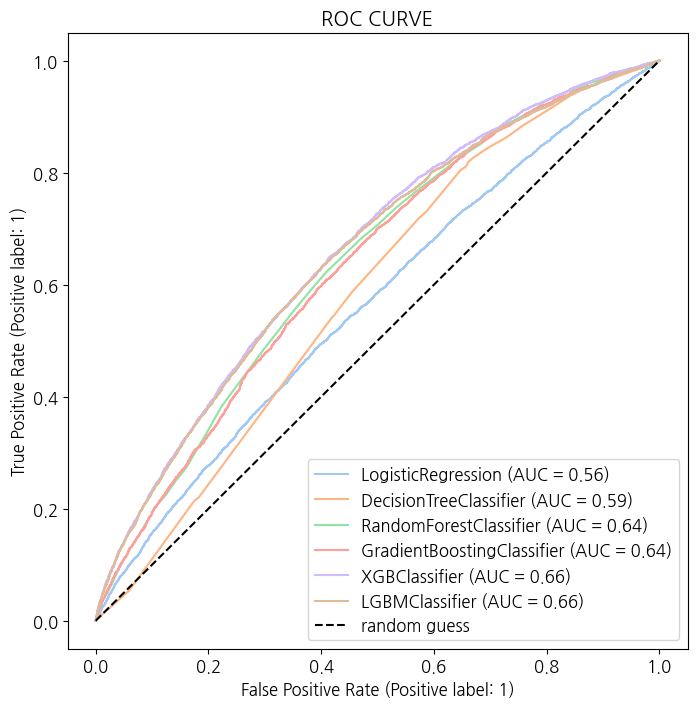

In [135]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

#### minmaxscaler + oversampling

In [136]:
# 수치형 변수 표준화
scaler = MinMaxScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,0.024537,0.046408,0.080292,0.005549,0.000000,0.000000,0.377879,0.303158,0.003157,0.001821,0.007500,0.000000,0.000000,0.037109,0.000000,0.000000,0.044892,0.025497,0.003158,0.0,0.003436,1.000000,0.005128,0.018868,0.043478,0.1,0.201431,0.25,0.000000,0.0,0.00,0.040816,0.336957
1,0.018836,0.002119,0.068127,0.000000,0.000000,0.000000,0.395673,0.308448,0.001353,0.000000,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.003870,0.001062,0.000729,0.0,0.000000,0.945455,0.000000,0.018868,0.043478,0.0,0.830490,0.00,0.000000,0.0,0.00,0.040816,0.445652
2,0.035924,0.001695,0.119221,0.000000,0.000000,0.000000,0.395906,0.308448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000153,0.000577,0.000000,0.001006,0.003931,0.000000,0.0,0.000000,0.981818,0.000000,0.018868,0.000000,0.0,1.000000,0.00,0.000000,0.0,0.00,0.147424,0.282609
3,0.071937,0.278025,0.209246,0.027525,0.000000,0.000000,0.414399,0.310704,0.234551,0.020036,0.090476,0.013138,0.019908,0.076471,0.711705,0.488372,0.430108,0.322639,0.145009,0.0,0.260023,0.963636,0.005128,0.037736,0.347826,0.3,0.254816,0.00,0.000000,0.0,0.00,0.000000,0.163043
4,0.018958,0.000000,0.068127,0.000000,0.000000,0.000000,0.396139,0.308393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.854545,0.005128,0.037736,0.130435,0.2,0.471657,0.00,0.000000,0.0,0.04,0.000000,0.543478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,0.100573,0.081373,0.099757,0.000000,0.097656,0.000000,0.396139,0.308448,0.018042,0.002602,0.032143,0.000000,0.000000,0.008285,0.002499,0.000000,0.076858,0.057686,0.012145,0.0,0.000000,0.436364,0.000000,0.018868,0.043478,0.1,0.271877,0.00,0.000000,0.0,0.00,0.040816,0.119565
50532,0.052869,0.111391,0.140706,0.019872,0.015636,0.001111,0.394796,0.308117,0.041949,0.007026,0.057500,0.000000,0.000000,0.022487,0.032673,0.004319,0.124071,0.035377,0.029147,0.0,0.003436,0.418182,0.000000,0.018868,0.043478,0.1,0.292240,0.00,0.000000,0.0,0.00,0.102041,0.717391
50533,0.082420,0.369782,0.233577,0.021976,0.017578,0.004225,0.410328,0.312876,0.075327,0.001821,0.049167,0.000000,0.000000,0.260184,0.172401,0.110631,0.246672,0.263784,0.042021,0.0,0.163803,0.418182,0.000000,0.018868,0.043478,0.1,0.258118,0.00,0.000000,0.0,0.04,0.102041,0.521739
50534,0.052869,0.111391,0.140706,0.019872,0.015636,0.001111,0.394796,0.308117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.454545,0.000000,0.018868,0.043478,0.1,0.241057,0.00,0.000000,0.0,0.00,0.040816,0.173913


In [137]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
y = train2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [138]:
smote = SMOTE(random_state=60)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((50438, 54), (50438,))

In [139]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [140]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.567377,0.348273,0.550417,0.426611,0.562401
DecisionTreeClassifier,0.629972,0.349373,0.307918,0.327338,0.535484
RandomForestClassifier,0.697975,0.457008,0.175051,0.253140,0.544554
GradientBoostingClassifier,0.704703,0.482400,0.136025,0.212212,0.537858
XGBClassifier,0.713277,0.535833,0.145048,0.228298,0.546564
LGBMClassifier,0.704307,0.487060,0.212272,0.295679,0.559948


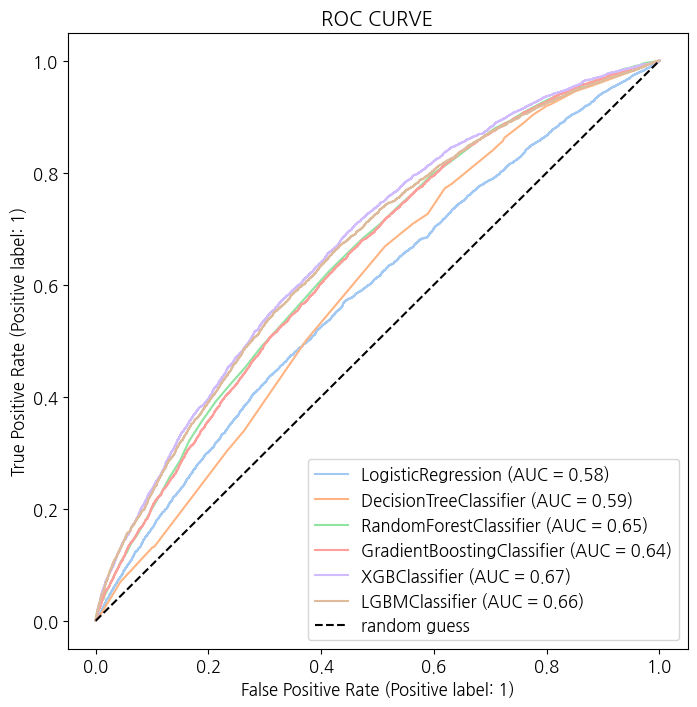

In [141]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

#### robustscaler + oversampling

In [142]:
# 수치형 변수 표준화
scaler = RobustScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

numeric_scaled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Age
0,-0.662908,-0.263736,-0.766667,0.000000,-0.050000,0.000000,-1.041379,-2.280488,-0.348485,-0.081081,-0.315961,0.000000,0.000000,0.324344,-0.443333,-0.222222,-0.031250,-0.146082,-0.377358,0.0,0.000000,3.461538,1.0,0.0,1.0,1.0,0.096463,1.0,0.0,0.0,0.0,-23.342041,0.108156
1,-0.855689,-0.646520,-0.933333,-0.337838,-0.050000,0.000000,0.013793,0.036585,-0.409091,-0.270270,-0.433225,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.583333,-0.451527,-0.471698,0.0,-0.230769,3.230769,0.0,0.0,1.0,0.0,3.771704,0.0,0.0,0.0,0.0,-23.342041,0.335429
2,-0.277896,-0.650183,-0.233333,-0.337838,-0.050000,0.000000,0.027586,0.036585,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.362669,-0.433333,-0.222222,-0.621875,-0.415671,-0.500000,0.0,-0.230769,3.384615,0.0,0.0,0.0,0.0,4.762058,0.0,0.0,0.0,0.0,0.000000,-0.005480
3,0.939842,1.738095,1.000000,1.337838,-0.050000,0.000000,1.124138,1.024390,7.424242,1.810811,1.954397,2.529412,4.333333,1.056068,11.900000,16.111111,5.153125,3.568393,5.132075,0.0,17.230769,3.307692,1.0,1.0,8.0,3.0,0.408360,0.0,0.0,0.0,0.0,-32.278858,-0.255480
4,-0.851564,-0.664835,-0.933333,-0.337838,-0.050000,0.000000,0.041379,0.012195,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.635417,-0.464807,-0.500000,0.0,-0.230769,2.846154,1.0,1.0,3.0,2.0,1.675241,0.0,0.0,0.0,1.0,-32.278858,0.539974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50531,1.908147,0.038462,-0.500000,-0.337838,6.200000,0.000000,0.041379,0.036585,0.151515,0.000000,0.358306,0.000000,0.000000,-0.211498,-0.400000,-0.222222,0.398958,0.256308,-0.028302,0.0,-0.230769,1.076923,0.0,0.0,1.0,1.0,0.508039,0.0,0.0,0.0,0.0,-23.342041,-0.346389
50532,0.295070,0.297900,0.061003,0.871931,0.950695,4.120814,-0.038261,-0.108779,0.954545,0.459459,1.052117,0.000000,0.000000,0.052520,0.123333,-0.077778,1.034375,-0.022576,0.632075,0.0,0.000000,1.000000,0.0,0.0,1.0,1.0,0.627010,0.0,0.0,0.0,0.0,-9.936817,0.903611
50533,1.294328,2.531136,1.333333,1.000000,1.075000,15.666667,0.882759,1.975610,2.075758,-0.081081,0.824104,0.000000,0.000000,4.471256,2.546667,3.477778,2.684375,2.832669,1.132075,0.0,10.769231,1.000000,0.0,0.0,1.0,1.0,0.427653,0.0,0.0,0.0,1.0,-9.936817,0.494520
50534,0.295070,0.297900,0.061003,0.871931,0.950695,4.120814,-0.038261,-0.108779,-0.454545,-0.270270,-0.521173,0.000000,0.000000,-0.365507,-0.443333,-0.222222,-0.635417,-0.464807,-0.500000,0.0,-0.230769,1.153846,0.0,0.0,1.0,1.0,0.327974,0.0,0.0,0.0,0.0,-23.342041,-0.232753


In [143]:
X = pd.concat([categoric_features, numeric_scaled], axis=1)
y = train2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [144]:
smote = SMOTE(random_state=60)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((50438, 54), (50438,))

In [145]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [146]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.581096,0.336236,0.444169,0.382739,0.540923
DecisionTreeClassifier,0.576545,0.343519,0.491992,0.404563,0.551738
RandomForestClassifier,0.689928,0.440018,0.221746,0.294885,0.552568
GradientBoostingClassifier,0.685641,0.432179,0.239341,0.308072,0.554700
XGBClassifier,0.710309,0.513303,0.178434,0.264814,0.554262
LGBMClassifier,0.707407,0.499227,0.218588,0.304048,0.563992


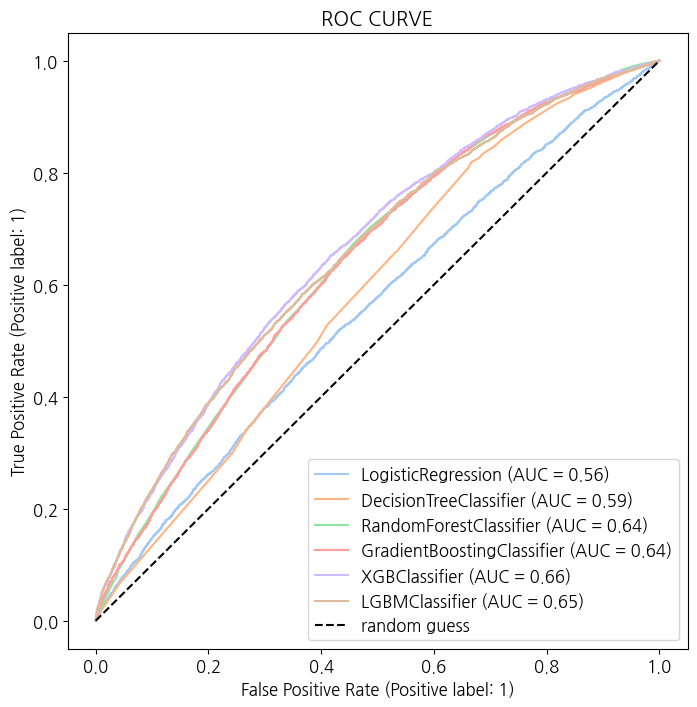

In [147]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_over, y_train_over), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

#### Borderline-SMOTE

In [148]:
y = train2['Churn']
X = train2.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [149]:
b_smote = BorderlineSMOTE(random_state=60, kind = 'borderline-1')
X_train_res, y_train_res = b_smote.fit_resample(X_train, y_train)

X_train_res.shape, y_train_res.shape

((50438, 54), (50438,))

In [150]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [151]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_res, y_train_res, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.596267,0.344280,0.420934,0.378768,0.544826
DecisionTreeClassifier,0.621067,0.365408,0.401760,0.382723,0.556724
RandomForestClassifier,0.683992,0.417283,0.203700,0.273761,0.543078
GradientBoostingClassifier,0.673966,0.398406,0.225581,0.288060,0.542414
XGBClassifier,0.700877,0.471219,0.188360,0.269138,0.550509
LGBMClassifier,0.708463,0.503235,0.228062,0.313878,0.567517


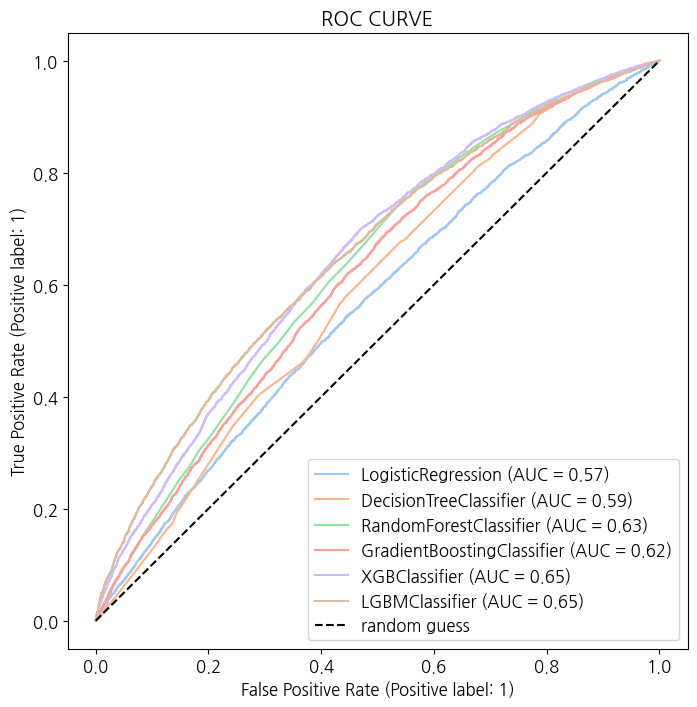

In [152]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()

#### ADASYN

In [153]:
y = train2['Churn']
X = train2.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [154]:
ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

X_train_res.shape, y_train_res.shape

((50069, 54), (50069,))

In [155]:
lr_clf = LogisticRegression(random_state=60, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=60, max_depth=6)
rf_clf = RandomForestClassifier(random_state=60, n_jobs=-1, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=60)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)

In [156]:
models = [lr_clf, dt_clf, rf_clf, gb_clf, xgb_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']
results = get_result_pd(models, model_names, X_train_res, y_train_res, X_test, y_test)

results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.593958,0.337238,0.402662,0.367057,0.537834
DecisionTreeClassifier,0.613878,0.343606,0.352132,0.347816,0.537084
RandomForestClassifier,0.678649,0.398427,0.194225,0.261146,0.536523
GradientBoostingClassifier,0.675087,0.400404,0.223551,0.286914,0.542611
XGBClassifier,0.699756,0.466289,0.185653,0.265570,0.548923
LGBMClassifier,0.705758,0.492879,0.218588,0.302860,0.562827


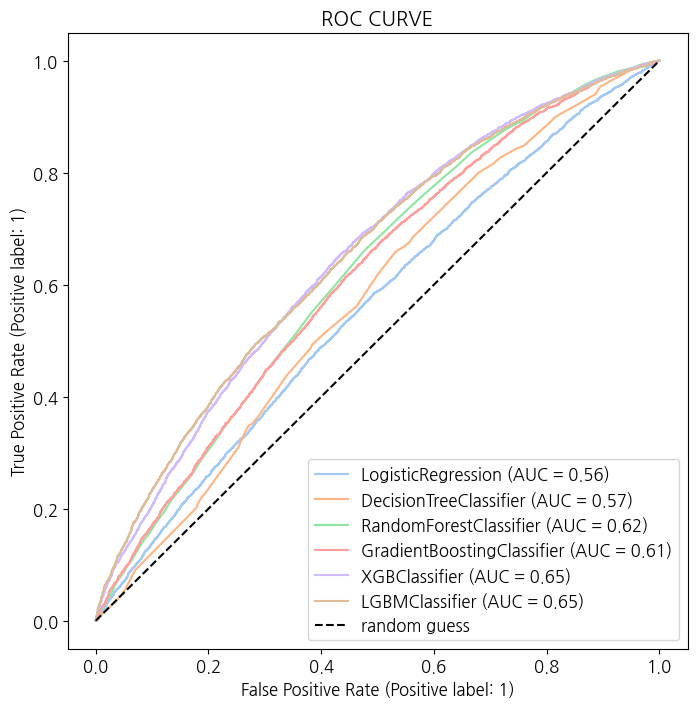

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

RocCurveDisplay.from_estimator(lr_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gb_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(xgb_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lgbm_clf.fit(X_train_res, y_train_res), X_test, y_test, ax=ax)

ax.plot([0,1], [0,1], 'k', ls = 'dashed', label='random guess')
ax.legend()
plt.title('ROC CURVE')
plt.show()